# UWB Dataset Preprocessing

In [1]:
""" Imports """
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from utils import *

# Load the datasets
dict_datasets = {
    'uwb_dataset_part1': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv'),
    'uwb_dataset_part2': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv'),
    'uwb_dataset_part3': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv'),
    'uwb_dataset_part4': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv'),
    'uwb_dataset_part5': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv'),
    'uwb_dataset_part6': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv'),
    'uwb_dataset_part7': pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')
}

In [2]:
# View LOS/NLOS Distribution for each dataset
for k, v in dict_datasets.items():
    print(f'{k}\n', v['NLOS'].value_counts(normalize=True) * 100, end='\n\n')

uwb_dataset_part1
 NLOS
0.0    50.533333
1.0    49.466667
Name: proportion, dtype: float64

uwb_dataset_part2
 NLOS
0.0    50.3
1.0    49.7
Name: proportion, dtype: float64

uwb_dataset_part3
 NLOS
0.0    50.133333
1.0    49.866667
Name: proportion, dtype: float64

uwb_dataset_part4
 NLOS
1.0    50.916667
0.0    49.083333
Name: proportion, dtype: float64

uwb_dataset_part5
 NLOS
0.0    50.55
1.0    49.45
Name: proportion, dtype: float64

uwb_dataset_part6
 NLOS
0.0    50.233333
1.0    49.766667
Name: proportion, dtype: float64

uwb_dataset_part7
 NLOS
1.0    50.833333
0.0    49.166667
Name: proportion, dtype: float64



We can observe that all seven datasets have unequal NLOS/LOS class distributions, due to dataset size differences, even though the differences are minor.

## Dataset Aggregation
Stratified sampling is performed on each UWB dataset to ensure generalisation of dataset classes, as each dataset has a different distribution of LOS / NLOS classes. Performing this has now ensured that the combined dataset is evenly balanced for subsequent processing operations.

In [3]:
# Initialise train-test lists
full_training = []
full_testing = []

# Create stratified train-test datasets, with stratified sampling based on 'NLOS' column iterate through EACH df INDIVIDUALLY! (70/30 split)
for k, v in dict_datasets.items():
    train, test = train_test_split(v, test_size=TEST_SIZE, stratify=v['NLOS'], random_state=RANDOM_STATE)
    full_training.append(train)
    full_testing.append(test)

# Concatenate the training and testing DataFrames
df_training = pd.concat(full_training)
df_testing = pd.concat(full_testing)

# Combine everything back together
df_original = pd.concat([df_training, df_testing])

# Display the combined DataFrame
df_original.reset_index(drop=True, inplace=True)

# Export dataset
save_to_pickle("original_dataset", df_original)
df_original

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       1.0   5.43   741.0   3561.0   5533.0   4948.0         88.0   1788.0   
1       1.0   6.04   743.0   8685.0   5344.0   8535.0        176.0   6103.0   
2       1.0   2.72   746.0   6445.0  19438.0  16356.0         32.0   7925.0   
3       1.0   9.33   745.0   7616.0   4470.0   2439.0         76.0   9447.0   
4       1.0   1.36   750.0   9729.0  16896.0  12385.0         64.0   6993.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   0.0   6.43   747.0  11328.0  16771.0  10854.0         72.0   9340.0   
41996   0.0   1.76   744.0  12940.0  15009.0  15644.0         48.0  10151.0   
41997   0.0   1.45   748.0  10061.0  18742.0  14321.0         56.0  10173.0   
41998   0.0   4.87   746.0   1751.0  12755.0  16031.0         52.0  11843.0   
41999   1.0   1.02   749.0  15827.0  20338.0  17273.0         48.0  12680.0   

       MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  \
0         1289.0  1024.0  ...    249.0    304.0    211.0     67.0    104.0   
1         2713.0  1024.0  ...    463.0    958.0    333.0    160.0    498.0   
2          741.0   329.0  ...    190.0     89.0    150.0    108.0    268.0   
3         1152.0  1024.0  ...    302.0    242.0    468.0    549.0    222.0   
4         1548.0   280.0  ...    143.0    349.0    222.0    117.0    123.0   
...          ...     ...  ...      ...      ...      ...      ...      ...   
41995     1082.0   952.0  ...    221.0    499.0    349.0    193.0    100.0   
41996     1097.0   289.0  ...    207.0    130.0    261.0    252.0    206.0   
41997     1509.0   276.0  ...    261.0     55.0    255.0    316.0    205.0   
41998      830.0   453.0  ...    150.0    145.0    115.0    211.0    194.0   
41999      948.0   415.0  ...    149.0    221.0    248.0    328.0    207.0   

       CIR1011  CIR1012  CIR1013  CIR1014  CIR1015  
0        297.0    351.0    101.0    204.0      0.0  
1        529.0    359.0   1005.0    448.0    512.0  
2         99.0      9.0    231.0    240.0      0.0  
3        192.0    128.0    112.0    260.0      0.0  
4        172.0    174.0    115.0    189.0      0.0  
...        ...      ...      ...      ...      ...  
41995    384.0    249.0    306.0    124.0      0.0  
41996    246.0    225.0    233.0    244.0    256.0  
41997    241.0    196.0    318.0    265.0      0.0  
41998    210.0    260.0    110.0    166.0      0.0  
41999    181.0    215.0    238.0    286.0      0.0  

[42000 rows x 1031 columns]

## Preliminary Exploratory Data Analysis

### Feature Analysis

In [5]:
# Get all features
print("Total Features:", len(df_original.columns), end='\n')

print("Non-CIR Features:", len(df_original.columns[:15]))
print(df_original.columns[:15], end='\n\n')

print("CIR Features:", len(df_original.columns[15:]))
print(df_original.columns[15:])

Total Features: 1031
Non-CIR Features: 15
Index(['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3',
       'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN',
       'PREAM_LEN', 'BITRATE', 'PRFR'],
      dtype='object')

CIR Features: 1016
Index(['CIR0', 'CIR1', 'CIR2', 'CIR3', 'CIR4', 'CIR5', 'CIR6', 'CIR7', 'CIR8',
       'CIR9',
       ...
       'CIR1006', 'CIR1007', 'CIR1008', 'CIR1009', 'CIR1010', 'CIR1011',
       'CIR1012', 'CIR1013', 'CIR1014', 'CIR1015'],
      dtype='object', length=1016)


With reference to the original UWB dataset authors' descriptions [[1]](#references), we can categorise the dataset features into **CIR (Channel Impulse Response)** and **Non-CIR**. 

A brief overview of all initial features is detailed below:

<ins>CIR Features</ins>
- `CIR0` to `CIR1015` (1016 samples with 1 nano-second resolution)

<ins>Non-CIR Features</ins>
- Class Feature
    - `NLOS` 
        - Indicates LOS/NLOS Class (0: LOS, 1: NLOS)
- Frame Quality Indicators (used to assess the quality of messages received, and any related timestamps [[2]](#references))
    - `RANGE`
        - Measured range (time of flight)
    - `FP_IDX` (First Power Index)
        - Index of detected first path element in CIR accumulator (**16-bit value** reporting the position within the accumulator that the Leading Edge (LDE) algorithm has determined to be the first path)
    - `FP_AMP1`
        - The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 1** beyond the integer portion of the rising edge `FP_IDX`.
    - `FP_AMP2`
        - The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 2** beyond the integer portion of the rising edge `FP_IDX`.
    - `FP_AMP3`
        - The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 3** beyond the integer portion of the rising edge `FP_IDX`.
    - `STDEV_NOISE` ($\sigma\ CIREN)$
        - Standard Deviation of CIR Estimate Noise (**16-bit value** reporting the standard deviation of the noise level seen during the LDE algorithm’s analysis of the accumulator data)
    - `CIR_PWR`
        - Total Channel Impulse Response Power (**16-bit value** reporting the sum of the squares of the magnitudes of the accumulator from the estimated highest power portion of the channel, which is related to the receive signal power)
    - `MAX_NOISE`
        - Maximum value of noise detected
    - `RXPACC`
        - Received RX preamble symbols (Preamble Accumulation Count)
    - `CH`
        - Channel value
    - `FRAME_LEN`
        - Length of frame
    - `PREAM_LEN`
        - Length of preamble
    - `BITRATE`
        - Message's bit rate
    - `PRFR`
        - Pulse Repetition Frequency Rate (Mhz)

### Preview Data

In [6]:
print("Dataset Features (excluding 1000+ CIR columns)")
df_original[['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']]

Dataset Features (excluding 1000+ CIR columns)


NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       1.0   5.43   741.0   3561.0   5533.0   4948.0         88.0   1788.0   
1       1.0   6.04   743.0   8685.0   5344.0   8535.0        176.0   6103.0   
2       1.0   2.72   746.0   6445.0  19438.0  16356.0         32.0   7925.0   
3       1.0   9.33   745.0   7616.0   4470.0   2439.0         76.0   9447.0   
4       1.0   1.36   750.0   9729.0  16896.0  12385.0         64.0   6993.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   0.0   6.43   747.0  11328.0  16771.0  10854.0         72.0   9340.0   
41996   0.0   1.76   744.0  12940.0  15009.0  15644.0         48.0  10151.0   
41997   0.0   1.45   748.0  10061.0  18742.0  14321.0         56.0  10173.0   
41998   0.0   4.87   746.0   1751.0  12755.0  16031.0         52.0  11843.0   
41999   1.0   1.02   749.0  15827.0  20338.0  17273.0         48.0  12680.0   

       MAX_NOISE  RXPACC   CH  FRAME_LEN  PREAM_LEN  BITRATE  PRFR  
0         1289.0  1024.0  2.0       27.0     1024.0    110.0  64.0  
1         2713.0  1024.0  2.0       39.0     1024.0    110.0  64.0  
2          741.0   329.0  2.0       39.0     1024.0    110.0  64.0  
3         1152.0  1024.0  2.0       39.0     1024.0    110.0  64.0  
4         1548.0   280.0  2.0       39.0     1024.0    110.0  64.0  
...          ...     ...  ...        ...        ...      ...   ...  
41995     1082.0   952.0  2.0       27.0     1024.0    110.0  64.0  
41996     1097.0   289.0  2.0       39.0     1024.0    110.0  64.0  
41997     1509.0   276.0  2.0       39.0     1024.0    110.0  64.0  
41998      830.0   453.0  2.0       39.0     1024.0    110.0  64.0  
41999      948.0   415.0  2.0       39.0     1024.0    110.0  64.0  

[42000 rows x 15 columns]

In [12]:
print("Dataset Features (CIR columns)")
df_original.iloc[:, 15:]

Dataset Features (CIR columns)


CIR0   CIR1   CIR2   CIR3   CIR4   CIR5   CIR6   CIR7   CIR8   CIR9  \
0      299.0  225.0  200.0  378.0   62.0  114.0  230.0  177.0  238.0  448.0   
1      550.0  313.0  737.0  416.0  643.0  528.0  537.0  994.0  708.0   94.0   
2      140.0  300.0  280.0  331.0  237.0  167.0   96.0   99.0   39.0  127.0   
3      467.0  265.0  410.0  376.0  233.0  214.0  470.0  359.0  342.0  172.0   
4      221.0  131.0  220.0  218.0  231.0   73.0  148.0  315.0  266.0  160.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
41995   80.0  141.0  196.0   93.0  122.0  198.0  342.0  501.0  452.0   96.0   
41996  173.0  136.0  251.0  260.0  245.0   88.0   93.0  244.0  249.0  301.0   
41997  192.0  285.0  243.0  211.0  222.0   67.0  311.0  205.0  293.0  269.0   
41998  182.0  162.0   95.0  268.0  196.0  134.0   88.0   63.0  236.0  127.0   
41999  195.0  163.0  197.0  110.0   88.0   76.0   63.0  164.0  266.0  212.0   

       ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  CIR1011  CIR1012  \
0      ...    249.0    304.0    211.0     67.0    104.0    297.0    351.0   
1      ...    463.0    958.0    333.0    160.0    498.0    529.0    359.0   
2      ...    190.0     89.0    150.0    108.0    268.0     99.0      9.0   
3      ...    302.0    242.0    468.0    549.0    222.0    192.0    128.0   
4      ...    143.0    349.0    222.0    117.0    123.0    172.0    174.0   
...    ...      ...      ...      ...      ...      ...      ...      ...   
41995  ...    221.0    499.0    349.0    193.0    100.0    384.0    249.0   
41996  ...    207.0    130.0    261.0    252.0    206.0    246.0    225.0   
41997  ...    261.0     55.0    255.0    316.0    205.0    241.0    196.0   
41998  ...    150.0    145.0    115.0    211.0    194.0    210.0    260.0   
41999  ...    149.0    221.0    248.0    328.0    207.0    181.0    215.0   

       CIR1013  CIR1014  CIR1015  
0        101.0    204.0      0.0  
1       1005.0    448.0    512.0  
2        231.0    240.0      0.0  
3        112.0    260.0      0.0  
4        115.0    189.0      0.0  
...        ...      ...      ...  
41995    306.0    124.0      0.0  
41996    233.0    244.0    256.0  
41997    318.0    265.0      0.0  
41998    110.0    166.0      0.0  
41999    238.0    286.0      0.0  

[42000 rows x 1016 columns]

### Check for any missing or null values

In [13]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df_original.isnull().isna().any().any()
missing_values

False

Upon analysis, there does not seem to be any missing values in the dataset.

### Check for any duplicated data

In [14]:
# Check for duplicated rows
df_original[df_original.duplicated()].shape[0]

0

Upon analysis, there does not seem to be any duplicated rows in the dataset.

### Find features with single-values only 


In [15]:
list_single_value_features = []
for column in df_original.columns:
    if(len(df_original[column].value_counts()) == 1):
        list_single_value_features.append(column)
list_single_value_features

['CH', 'BITRATE', 'PRFR']

In [16]:
for column in list_single_value_features:
    print(df_original[column].value_counts(), end="\n\n")

CH
2.0    42000
Name: count, dtype: int64

BITRATE
110.0    42000
Name: count, dtype: int64

PRFR
64.0    42000
Name: count, dtype: int64



We observe that three features have single-values. Since these features only have one value, they will be dropped later on.
- `CH` (Channel Number, consists of single value 2.0)
- `BITRATE` (Bitrate, consists of single value 110.0)
- `PRFR` (Pulse Repetition Frequency, consists of single value 64.0)
    - Will be used to indicate the value of constant A in calculations for `RX_POWER` and `FP_POWER` later on.

## Feature Engineering
Based on the domain knowledge derived from [[3]](#references), we will perform the following:
1. [Feature Creation](#feature-creation)
    - Create `FP_POWER`, `RX_POWER`, `D_POWER`, `D_POWER_LOS`, `D_POWER_NLOS` features
2. [Dataset Subsetting](#dataset-subsetting)
    - Create data-subsets from the original dataset

In [8]:
# Create a copy of the original dataframe before moving on
df_original_copy = df_original.copy()

### Feature Creation
Create `FP_POWER` (First Path Power Level), `RX_POWER` (Receive Signal Power Level) and `D_POWER` (Difference between `FP_POWER` and `RX_POWER`) features. Based on Section 4.7 of the Decawave DWM1000 Radio Module's [manual](https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf).

#### Compute the First Path Power Level `FP_POWER`
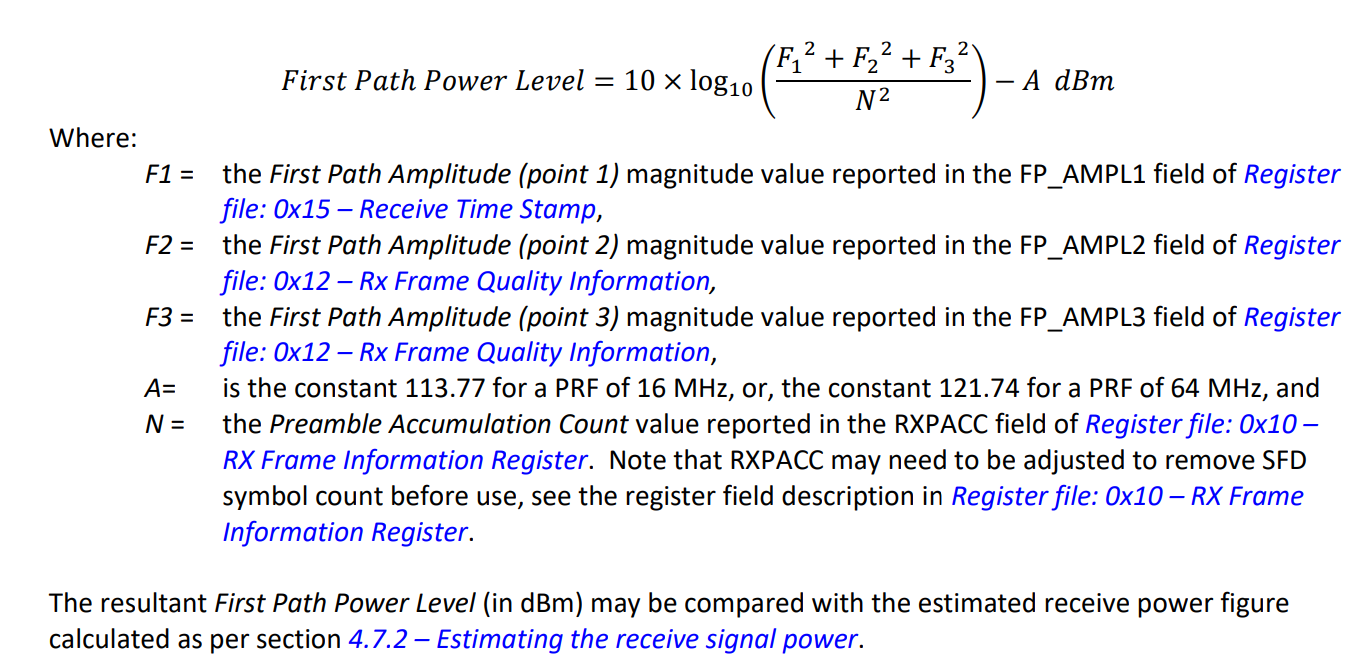

- $F_1$: `FP_AMP1` (first path amplitude - part1) [look in user manual](http://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf)
- $F_2$: `FP_AMP2` (first path amplitude - part2) [look in user manual](http://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf)
- $F_3$: `FP_AMP3` (first path amplitude - part3) [look in user manual](http://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf)
- $N$: `RXPACC` (received RX preamble symbols)
- $A$: 121.74 (constant value for `PRFR` of 64MHz)

In [9]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_original['PRFR'][0] == 64.0 else 113.77 if df_original['PRFR'][0] == 16.0 else 0

# Initialise FP_POWER
df_original_copy['FP_POWER'] = 0.0

# Compute numerator and denominator
numerator = (df_original_copy['FP_AMP1']**2) + (df_original_copy['FP_AMP2']**2) + (df_original_copy['FP_AMP3']**2)
denominator = df_original_copy['RXPACC']**2

# Compute FP_POWER (First Path Power Level), ensuring that the numerator is not 0 to prevent log10(0) error
df_original_copy.loc[numerator != 0.0, 'FP_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_original_copy

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
1       0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2       0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3       0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
4       0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
41996   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
41997   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
41998   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
41999   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

       MAX_NOISE  RXPACC  ...  CIR1007  CIR1008  CIR1009  CIR1010  CIR1011  \
0         1645.0   654.0  ...    713.0    446.0    273.0    340.0    494.0   
1         1189.0   280.0  ...     31.0     62.0    267.0    102.0    359.0   
2         3111.0   268.0  ...    419.0    311.0    185.0    274.0    258.0   
3         1414.0   293.0  ...    191.0     58.0    276.0    249.0    298.0   
4          743.0   413.0  ...    129.0    264.0     77.0    104.0    313.0   
...          ...     ...  ...      ...      ...      ...      ...      ...   
41995     1188.0  1024.0  ...    335.0    291.0    138.0    176.0    224.0   
41996     3126.0   669.0  ...    341.0    314.0    445.0    332.0   1000.0   
41997     1068.0   695.0  ...    246.0     71.0    374.0    183.0     16.0   
41998     1071.0   808.0  ...    182.0    177.0     74.0    278.0    204.0   
41999     1028.0  1024.0  ...    187.0    187.0    377.0    269.0    191.0   

       CIR1012  CIR1013  CIR1014  CIR1015    FP_POWER  
0        378.0    546.0     30.0    256.0  -94.596003  
1        156.0    132.0     79.0      0.0  -82.200844  
2        212.0    305.0     56.0    256.0  -81.821606  
3         64.0    100.0    112.0      0.0  -82.833613  
4        234.0     74.0    165.0      0.0  -86.455578  
...        ...      ...      ...      ...         ...  
41995    210.0    205.0    289.0      0.0 -109.446217  
41996   1337.0    304.0    922.0    256.0 -103.265570  
41997    160.0    266.0    269.0    256.0  -93.474549  
41998    150.0    181.0    145.0      0.0 -114.306118  
41999    159.0    276.0    407.0      0.0 -107.508017  

[42000 rows x 1032 columns]

In [10]:
# Check for records with zero FP_POWER (default value assigned for rows with zero-valued FP_AMP* or RXPACC)
df_original_copy[df_original_copy['FP_POWER'] == 0]

Empty DataFrame
Columns: [NLOS, RANGE, FP_IDX, FP_AMP1, FP_AMP2, FP_AMP3, STDEV_NOISE, CIR_PWR, MAX_NOISE, RXPACC, CH, FRAME_LEN, PREAM_LEN, BITRATE, PRFR, CIR0, CIR1, CIR2, CIR3, CIR4, CIR5, CIR6, CIR7, CIR8, CIR9, CIR10, CIR11, CIR12, CIR13, CIR14, CIR15, CIR16, CIR17, CIR18, CIR19, CIR20, CIR21, CIR22, CIR23, CIR24, CIR25, CIR26, CIR27, CIR28, CIR29, CIR30, CIR31, CIR32, CIR33, CIR34, CIR35, CIR36, CIR37, CIR38, CIR39, CIR40, CIR41, CIR42, CIR43, CIR44, CIR45, CIR46, CIR47, CIR48, CIR49, CIR50, CIR51, CIR52, CIR53, CIR54, CIR55, CIR56, CIR57, CIR58, CIR59, CIR60, CIR61, CIR62, CIR63, CIR64, CIR65, CIR66, CIR67, CIR68, CIR69, CIR70, CIR71, CIR72, CIR73, CIR74, CIR75, CIR76, CIR77, CIR78, CIR79, CIR80, CIR81, CIR82, CIR83, CIR84, ...]
Index: []

[0 rows x 1032 columns]

#### Compute the Receive Signal Power Level `RX_POWER`
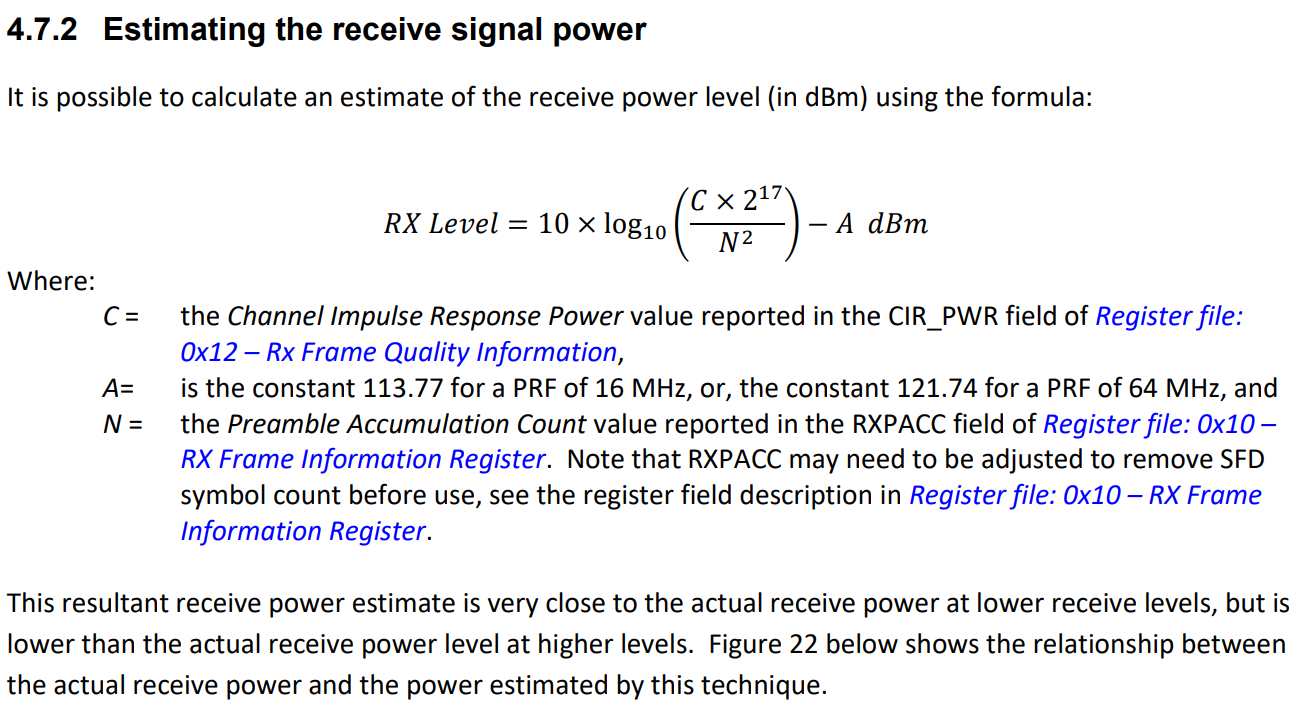

- $C$: `CIR_PWR` (total channel impulse response power)
- $N$: `RXPACC` (received RX preamble symbols)
- $A$: 121.74 (constant value for `PRFR` of 64MHz)

In [11]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_original['PRFR'][0] == 64.0 else 113.77 if df_original['PRFR'][0] == 16.0 else 0

# Initialise RX_POWER
df_original_copy['RX_POWER'] = 0.0

# Compute numerator and denominator
numerator = df_original_copy['CIR_PWR'] * (2**17)
denominator = df_original_copy['RXPACC']**2

# Suppress divide by zero warning
with np.errstate(divide='ignore'):
    # Compute RX_POWER (Receive Signal Power Level), ensuring that the numerator is not 0 to prevent log10(0) error (RuntimeWarning will be raised, but can be ignored)
    df_original_copy.loc[numerator != 0.0, 'RX_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
    
df_original_copy

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
1       0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2       0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3       0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
4       0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
41996   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
41997   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
41998   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
41999   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

       MAX_NOISE  RXPACC  ...  CIR1008  CIR1009  CIR1010  CIR1011  CIR1012  \
0         1645.0   654.0  ...    446.0    273.0    340.0    494.0    378.0   
1         1189.0   280.0  ...     62.0    267.0    102.0    359.0    156.0   
2         3111.0   268.0  ...    311.0    185.0    274.0    258.0    212.0   
3         1414.0   293.0  ...     58.0    276.0    249.0    298.0     64.0   
4          743.0   413.0  ...    264.0     77.0    104.0    313.0    234.0   
...          ...     ...  ...      ...      ...      ...      ...      ...   
41995     1188.0  1024.0  ...    291.0    138.0    176.0    224.0    210.0   
41996     3126.0   669.0  ...    314.0    445.0    332.0   1000.0   1337.0   
41997     1068.0   695.0  ...     71.0    374.0    183.0     16.0    160.0   
41998     1071.0   808.0  ...    177.0     74.0    278.0    204.0    150.0   
41999     1028.0  1024.0  ...    187.0    377.0    269.0    191.0    159.0   

       CIR1013  CIR1014  CIR1015    FP_POWER    RX_POWER  
0        546.0     30.0    256.0  -94.596003  -83.242593  
1        132.0     79.0      0.0  -82.200844  -78.924940  
2        305.0     56.0    256.0  -81.821606  -78.433506  
3        100.0    112.0      0.0  -82.833613  -78.878945  
4         74.0    165.0      0.0  -86.455578  -82.764816  
...        ...      ...      ...         ...         ...  
41995    205.0    289.0      0.0 -109.446217  -94.681363  
41996    304.0    922.0    256.0 -103.265570  -88.436032  
41997    266.0    269.0    256.0  -93.474549  -81.707347  
41998    181.0    145.0      0.0 -114.306118  -87.757599  
41999    276.0    407.0      0.0 -107.508017 -100.916635  

[42000 rows x 1033 columns]

In [12]:
# Check for records with zero RX_POWER (default value assigned for rows with zero-valued CIR_PWR or RXPACC)
df_original_copy[df_original_copy['RX_POWER'] == 0]

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
2261    1.0   7.02   757.0     30.0    214.0    413.0         36.0      0.0   
16288   1.0   4.88   739.0    112.0    323.0    227.0         40.0      0.0   
24651   1.0   6.33   747.0    293.0    311.0    187.0         28.0      0.0   

       MAX_NOISE  RXPACC  ...  CIR1008  CIR1009  CIR1010  CIR1011  CIR1012  \
2261       412.0   192.0  ...    190.0    292.0    271.0    239.0    210.0   
16288      322.0   128.0  ...    295.0    242.0    279.0     67.0    153.0   
24651      310.0   160.0  ...    246.0    353.0    196.0     38.0    228.0   

       CIR1013  CIR1014  CIR1015    FP_POWER  RX_POWER  
2261     260.0    223.0    256.0 -114.036127       0.0  
16288    177.0    159.0      0.0 -111.620727       0.0  
24651     42.0    173.0      0.0 -112.447028       0.0  

[3 rows x 1033 columns]

#### Compute the difference between `FP_POWER` and `RX_POWER` (`D_POWER`)
$D$: `RX_POWER` - `FP_POWER`

In [13]:
# Compute D_POWER (difference between FP_POWER and RX_POWER)
df_original_copy['D_POWER'] = df_original_copy['RX_POWER'] - df_original_copy['FP_POWER']
df_original_copy

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
1       0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2       0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3       0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
4       0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
41996   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
41997   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
41998   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
41999   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

       MAX_NOISE  RXPACC  ...  CIR1009  CIR1010  CIR1011  CIR1012  CIR1013  \
0         1645.0   654.0  ...    273.0    340.0    494.0    378.0    546.0   
1         1189.0   280.0  ...    267.0    102.0    359.0    156.0    132.0   
2         3111.0   268.0  ...    185.0    274.0    258.0    212.0    305.0   
3         1414.0   293.0  ...    276.0    249.0    298.0     64.0    100.0   
4          743.0   413.0  ...     77.0    104.0    313.0    234.0     74.0   
...          ...     ...  ...      ...      ...      ...      ...      ...   
41995     1188.0  1024.0  ...    138.0    176.0    224.0    210.0    205.0   
41996     3126.0   669.0  ...    445.0    332.0   1000.0   1337.0    304.0   
41997     1068.0   695.0  ...    374.0    183.0     16.0    160.0    266.0   
41998     1071.0   808.0  ...     74.0    278.0    204.0    150.0    181.0   
41999     1028.0  1024.0  ...    377.0    269.0    191.0    159.0    276.0   

       CIR1014  CIR1015    FP_POWER    RX_POWER    D_POWER  
0         30.0    256.0  -94.596003  -83.242593  11.353411  
1         79.0      0.0  -82.200844  -78.924940   3.275904  
2         56.0    256.0  -81.821606  -78.433506   3.388100  
3        112.0      0.0  -82.833613  -78.878945   3.954668  
4        165.0      0.0  -86.455578  -82.764816   3.690762  
...        ...      ...         ...         ...        ...  
41995    289.0      0.0 -109.446217  -94.681363  14.764854  
41996    922.0    256.0 -103.265570  -88.436032  14.829538  
41997    269.0    256.0  -93.474549  -81.707347  11.767202  
41998    145.0      0.0 -114.306118  -87.757599  26.548519  
41999    407.0      0.0 -107.508017 -100.916635   6.591382  

[42000 rows x 1034 columns]

### Check NLOS/LOS class of dataset, based on their `D_POWER` values (reference to Section 4.7 of the Decawave DWM1000 Radio Module's [manual](https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf))
Analysis of the class values

In [14]:
# If D_POWER < 6dB, LOS
print("D_POWER < 6dB (Supposed to be LOS)")
# print(df_original_copy[df_original_copy['D_POWER'] < 6.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_original_copy[df_original_copy['D_POWER'] < 6.0]['NLOS']) * 100):.2f}%)" for label, count in df_original_copy[df_original_copy['D_POWER'] < 6.0]['NLOS'].value_counts().items()})

# If D_POWER > 10dB, NLOS
print("\nD_POWER > 10dB (Supposed to be NLOS)")
# print(df_original_copy[df_original_copy['D_POWER'] > 10.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_original_copy[df_original_copy['D_POWER'] > 10.0]['NLOS']) * 100):.2f}%)" for label, count in df_original_copy[df_original_copy['D_POWER'] > 10.0]['NLOS'].value_counts().items()})

D_POWER < 6dB (Supposed to be LOS)
{0.0: '14910 (66.00%)', 1.0: '7682 (34.00%)'}

D_POWER > 10dB (Supposed to be NLOS)
{1.0: '8125 (80.52%)', 0.0: '1966 (19.48%)'}


In [15]:
# Create one-hot columns based on the D_POWER thresholds
df_original_copy['D_POWER_LOS'] = (df_original_copy['D_POWER'] < 6.0).astype(int)
df_original_copy['D_POWER_NLOS'] = (df_original_copy['D_POWER'] > 10.0).astype(int)
df_original_copy

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
1       0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2       0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3       0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
4       0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
41996   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
41997   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
41998   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
41999   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

       MAX_NOISE  RXPACC  ...  CIR1011  CIR1012  CIR1013  CIR1014  CIR1015  \
0         1645.0   654.0  ...    494.0    378.0    546.0     30.0    256.0   
1         1189.0   280.0  ...    359.0    156.0    132.0     79.0      0.0   
2         3111.0   268.0  ...    258.0    212.0    305.0     56.0    256.0   
3         1414.0   293.0  ...    298.0     64.0    100.0    112.0      0.0   
4          743.0   413.0  ...    313.0    234.0     74.0    165.0      0.0   
...          ...     ...  ...      ...      ...      ...      ...      ...   
41995     1188.0  1024.0  ...    224.0    210.0    205.0    289.0      0.0   
41996     3126.0   669.0  ...   1000.0   1337.0    304.0    922.0    256.0   
41997     1068.0   695.0  ...     16.0    160.0    266.0    269.0    256.0   
41998     1071.0   808.0  ...    204.0    150.0    181.0    145.0      0.0   
41999     1028.0  1024.0  ...    191.0    159.0    276.0    407.0      0.0   

         FP_POWER    RX_POWER    D_POWER  D_POWER_LOS  D_POWER_NLOS  
0      -94.596003  -83.242593  11.353411            0             1  
1      -82.200844  -78.924940   3.275904            1             0  
2      -81.821606  -78.433506   3.388100            1             0  
3      -82.833613  -78.878945   3.954668            1             0  
4      -86.455578  -82.764816   3.690762            1             0  
...           ...         ...        ...          ...           ...  
41995 -109.446217  -94.681363  14.764854            0             1  
41996 -103.265570  -88.436032  14.829538            0             1  
41997  -93.474549  -81.707347  11.767202            0             1  
41998 -114.306118  -87.757599  26.548519            0             1  
41999 -107.508017 -100.916635   6.591382            0             0  

[42000 rows x 1036 columns]

### Dataset Subsetting
- Non-CIR Dataset (Dataset without 1000+ CIR columns)
    - Features used to obtain derived features `FP_POWER`, `RX_POWER` and `D_POWER` are removed

- Non-CIR-Trimmed Dataset (Dataset without 1000+ CIR columns, and with unimportant features removed)
    - Features used to obtain derived features `FP_POWER`, `RX_POWER` and `D_POWER` are removed
    - Unimportant features are removed

- CIR Dataset (Dataset that only consists of 1000+ CIR columns)
    - CIR features are re-engineered into their descriptive statistical values (mean, variance etc)

- Data-Subset Variants:
    - `df_noncir`: Non-CIR
    - `df_trim`: Non-CIR-Trimmed
    - `df_cir`: CIR
    - `df_pca`: PCA(CIR)
    
- Dataset Variants
    - `df_noncir_cir`: Non-CIR + CIR
    - `df_noncir_pca`: Non-CIR + PCA(CIR)
    - `df_trim_cir`: Non-CIR-Trimmed + CIR
    - `df_trim_pca`: Non-CIR-Trimmed + PCA(CIR)

### Data Subset: Non-CIR Dataset

In [16]:
# Build non-CIR dataset (first 15 features of original dataset, and last 5 derived features of the dataset's copy)
df_noncir = pd.concat([df_original.iloc[:, :15], df_original_copy.iloc[:, -5:]], axis=1)

# Remove attributes used to compute derived features, and single-valued attributes (CH, BITRATE, PRFR)
df_noncir.drop(columns=['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'BITRATE', 'PRFR'], inplace=True)
df_noncir

NLOS  RANGE  FP_IDX  STDEV_NOISE  MAX_NOISE  FRAME_LEN  PREAM_LEN  \
0       0.0   4.88   744.0        108.0     1645.0       27.0     1024.0   
1       0.0   0.97   746.0         48.0     1189.0       27.0     1024.0   
2       0.0   1.07   745.0        116.0     3111.0       39.0     1024.0   
3       0.0   0.90   751.0         60.0     1414.0       39.0     1024.0   
4       0.0   2.79   744.0         44.0      743.0       27.0     1024.0   
...     ...    ...     ...          ...        ...        ...        ...   
41995   1.0   4.25   745.0         80.0     1188.0       39.0     1024.0   
41996   1.0   2.25   744.0        204.0     3126.0       39.0     1024.0   
41997   0.0   2.48   750.0         72.0     1068.0       27.0     1024.0   
41998   1.0   6.87   738.0         72.0     1071.0       39.0     1024.0   
41999   1.0   6.02   742.0         68.0     1028.0       27.0     1024.0   

         FP_POWER    RX_POWER    D_POWER  D_POWER_LOS  D_POWER_NLOS  
0      -94.596003  -83.242593  11.353411            0             1  
1      -82.200844  -78.924940   3.275904            1             0  
2      -81.821606  -78.433506   3.388100            1             0  
3      -82.833613  -78.878945   3.954668            1             0  
4      -86.455578  -82.764816   3.690762            1             0  
...           ...         ...        ...          ...           ...  
41995 -109.446217  -94.681363  14.764854            0             1  
41996 -103.265570  -88.436032  14.829538            0             1  
41997  -93.474549  -81.707347  11.767202            0             1  
41998 -114.306118  -87.757599  26.548519            0             1  
41999 -107.508017 -100.916635   6.591382            0             0  

[42000 rows x 12 columns]

### Exploratory Data Analysis: Non-CIR Dataset
- Perform scaling to shift data values to adjust differences among attributes in terms of frequency of occurrence, mean, variance, range
- Identification of unimportant features to be removed to derive `Non-CIR-Trimmed` dataset
    - Plot histogram to check for skewed data, if data is very similarly normally distributed it's not the best, as you can find greater differences in skewed data.

#### Scaling of Non-CIR dataset

In [17]:
# Min-Max Scaling (shift and rescale data values so they are within the range of [0, 1])
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale non-CIR dataset
df_noncir_mm_scaled = pd.DataFrame(scaler.fit_transform(df_noncir), columns=df_noncir.columns)

print("Min-Max scaled non-CIR dataset")
df_noncir_mm_scaled

Min-Max scaled non-CIR dataset


NLOS     RANGE    FP_IDX  STDEV_NOISE  MAX_NOISE  FRAME_LEN  PREAM_LEN  \
0       0.0  0.174161  0.262411     0.270270   0.274748        0.0        0.0   
1       0.0  0.034618  0.276596     0.067568   0.180901        0.0        0.0   
2       0.0  0.038187  0.269504     0.297297   0.576456        1.0        0.0   
3       0.0  0.032120  0.312057     0.108108   0.227207        1.0        0.0   
4       0.0  0.099572  0.262411     0.054054   0.089113        0.0        0.0   
...     ...       ...       ...          ...        ...        ...        ...   
41995   1.0  0.151677  0.269504     0.175676   0.180696        1.0        0.0   
41996   1.0  0.080300  0.262411     0.594595   0.579543        1.0        0.0   
41997   0.0  0.088508  0.304965     0.148649   0.155999        0.0        0.0   
41998   1.0  0.245182  0.219858     0.148649   0.156617        1.0        0.0   
41999   1.0  0.214847  0.248227     0.135135   0.147767        0.0        0.0   

       FP_POWER  RX_POWER   D_POWER  D_POWER_LOS  D_POWER_NLOS  
0      0.633126  0.283817  0.188865          0.0           1.0  
1      0.947738  0.320964  0.125057          1.0           0.0  
2      0.957364  0.325192  0.125943          1.0           0.0  
3      0.931677  0.321360  0.130419          1.0           0.0  
4      0.839745  0.287928  0.128334          1.0           0.0  
...         ...       ...       ...          ...           ...  
41995  0.256200  0.185403  0.215813          0.0           1.0  
41996  0.413076  0.239135  0.216324          0.0           1.0  
41997  0.661591  0.297026  0.192133          0.0           1.0  
41998  0.132847  0.244972  0.308897          0.0           1.0  
41999  0.305395  0.131757  0.151247          0.0           0.0  

[42000 rows x 12 columns]

In [18]:
# Standard Scaling / Z-Score Normalisation (scale numerical features in a dataset to have a mean of 0 and a standard deviation of 1)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale non-CIR dataset
df_noncir_standard_scaled = pd.DataFrame(scaler.fit_transform(df_noncir), columns=df_noncir.columns)

print("Standard scaled non-CIR dataset")
df_noncir_standard_scaled

Standard scaled non-CIR dataset


NLOS     RANGE    FP_IDX  STDEV_NOISE  MAX_NOISE  FRAME_LEN  PREAM_LEN  \
0      -1.0  0.445036 -0.367187     1.218181   0.564711  -1.143893  -0.196211   
1      -1.0 -1.214594  0.076767    -0.828298  -0.218218  -1.143893  -0.196211   
2      -1.0 -1.172148 -0.145210     1.491045   3.081760   0.874219  -0.196211   
3      -1.0 -1.244306  1.186652    -0.419002   0.168095   0.874219  -0.196211   
4      -1.0 -0.442081 -0.367187    -0.964730  -0.983978  -1.143893  -0.196211   
...     ...       ...       ...          ...        ...        ...        ...   
41995   1.0  0.177627 -0.145210     0.263158  -0.219935   0.874219  -0.196211   
41996   1.0 -0.671288 -0.367187     4.492548   3.107514   0.874219  -0.196211   
41997  -1.0 -0.573663  0.964675    -0.009706  -0.425969  -1.143893  -0.196211   
41998   1.0  1.289706 -1.699049    -0.009706  -0.420819   0.874219  -0.196211   
41999   1.0  0.928917 -0.811141    -0.146138  -0.494647  -1.143893  -0.196211   

       FP_POWER  RX_POWER   D_POWER  D_POWER_LOS  D_POWER_NLOS  
0     -0.149441  0.430797  0.844928    -1.078914      1.778236  
1      1.130357  1.079509 -0.736875     0.926858     -0.562355  
2      1.169513  1.153346 -0.714904     0.926858     -0.562355  
3      1.065024  1.086420 -0.603954     0.926858     -0.562355  
4      0.691056  0.502581 -0.655634     0.926858     -0.562355  
...         ...       ...       ...          ...           ...  
41995 -1.682722 -1.287838  1.512984    -1.078914      1.778236  
41996 -1.044572 -0.349499  1.525651    -1.078914      1.778236  
41997 -0.033651  0.661462  0.925960    -1.078914      1.778236  
41998 -2.184506 -0.247567  3.820558    -1.078914      1.778236  
41999 -1.482603 -2.224666 -0.087611    -1.078914     -0.562355  

[42000 rows x 12 columns]

### Plot Feature-NLOS Histogram
Plot histogram of `Feature`-`NLOS` to check for variability (skewed data), if data is very similarly normally distributed, feature may not be useful for deriving LOS/NLOS classification, as you can find greater differences in skewed data.

From the diagrams, we can observe that `RANGE`, `FP_IDX`, `STDEV_NOISE`, `MAX_NOISE` have no clear distinct separations between the LOS/NLOS classes, so there is no clear relationship that can be drawn out when using those features. Additionally, the distribution of data is the same, regardless of scaling.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Function to plot feature-NLOS histogram
def plot_histogram(df, features):
    # Plot numerical features with respect to the target variable
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features, start=1):
        plt.subplot(len(features)//2 + 1, 2, i)
        sns.histplot(data=df, x=feature, hue='NLOS', kde=True, stat='density', common_norm=False)
        plt.title(f'Distribution of {feature} by NLOS')
        plt.xlabel(feature)
        plt.ylabel('Density')
        
        # Calculate skewness for LOS and NLOS classes
        los_skewness = df[df['NLOS'] == 0][feature].skew()
        nlos_skewness = df[df['NLOS'] == 1][feature].skew()

        # Annotate skewness values on the plot
        plt.text(0.9, 0.9, f'Skewness (LOS): {los_skewness:.2f}\nSkewness (NLOS): {nlos_skewness:.2f}', 
                 horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.show()

#### Non-CIR Dataset (unscaled) histograms

Histograms for unscaled non-CIR dataset


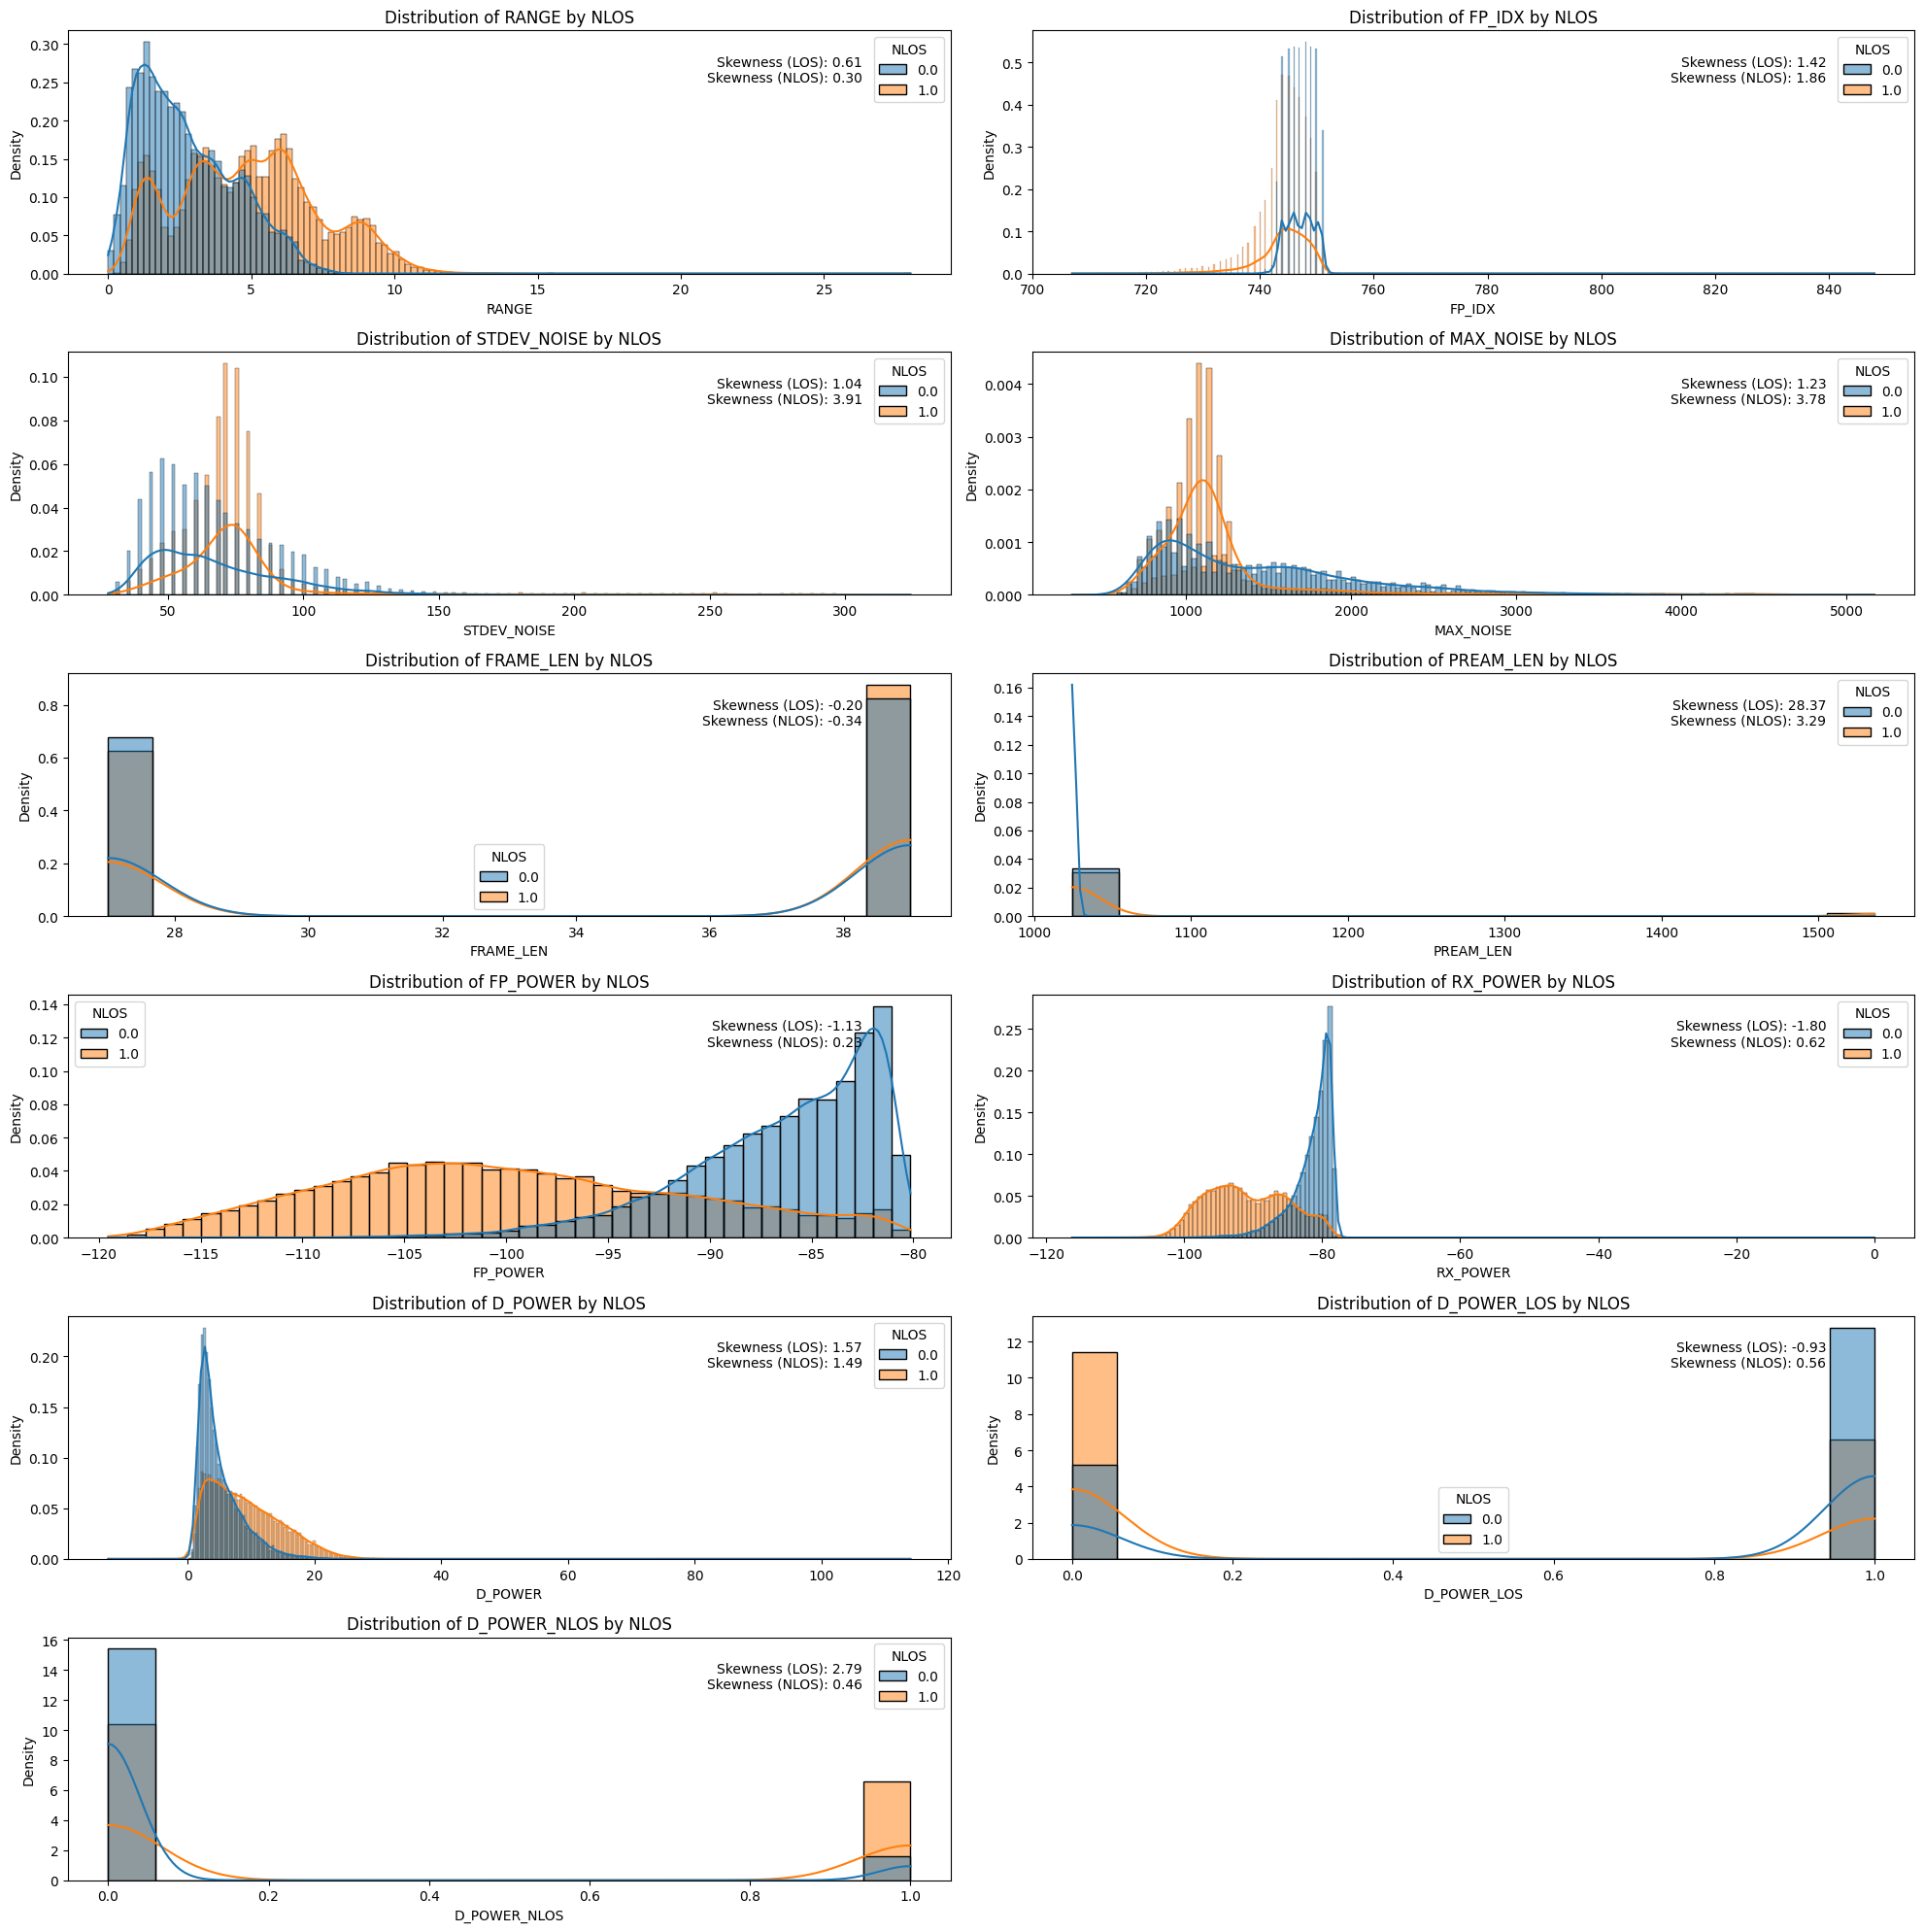

In [20]:
# Get non-class features
features = [i for i in df_noncir.columns if i != 'NLOS']

# Plot histograms
print("Histograms for unscaled non-CIR dataset")
plot_histogram(df_noncir, features)

#### Non-CIR Dataset (Min-Max scaled) histograms

Histograms for Min-Max scaled non-CIR dataset


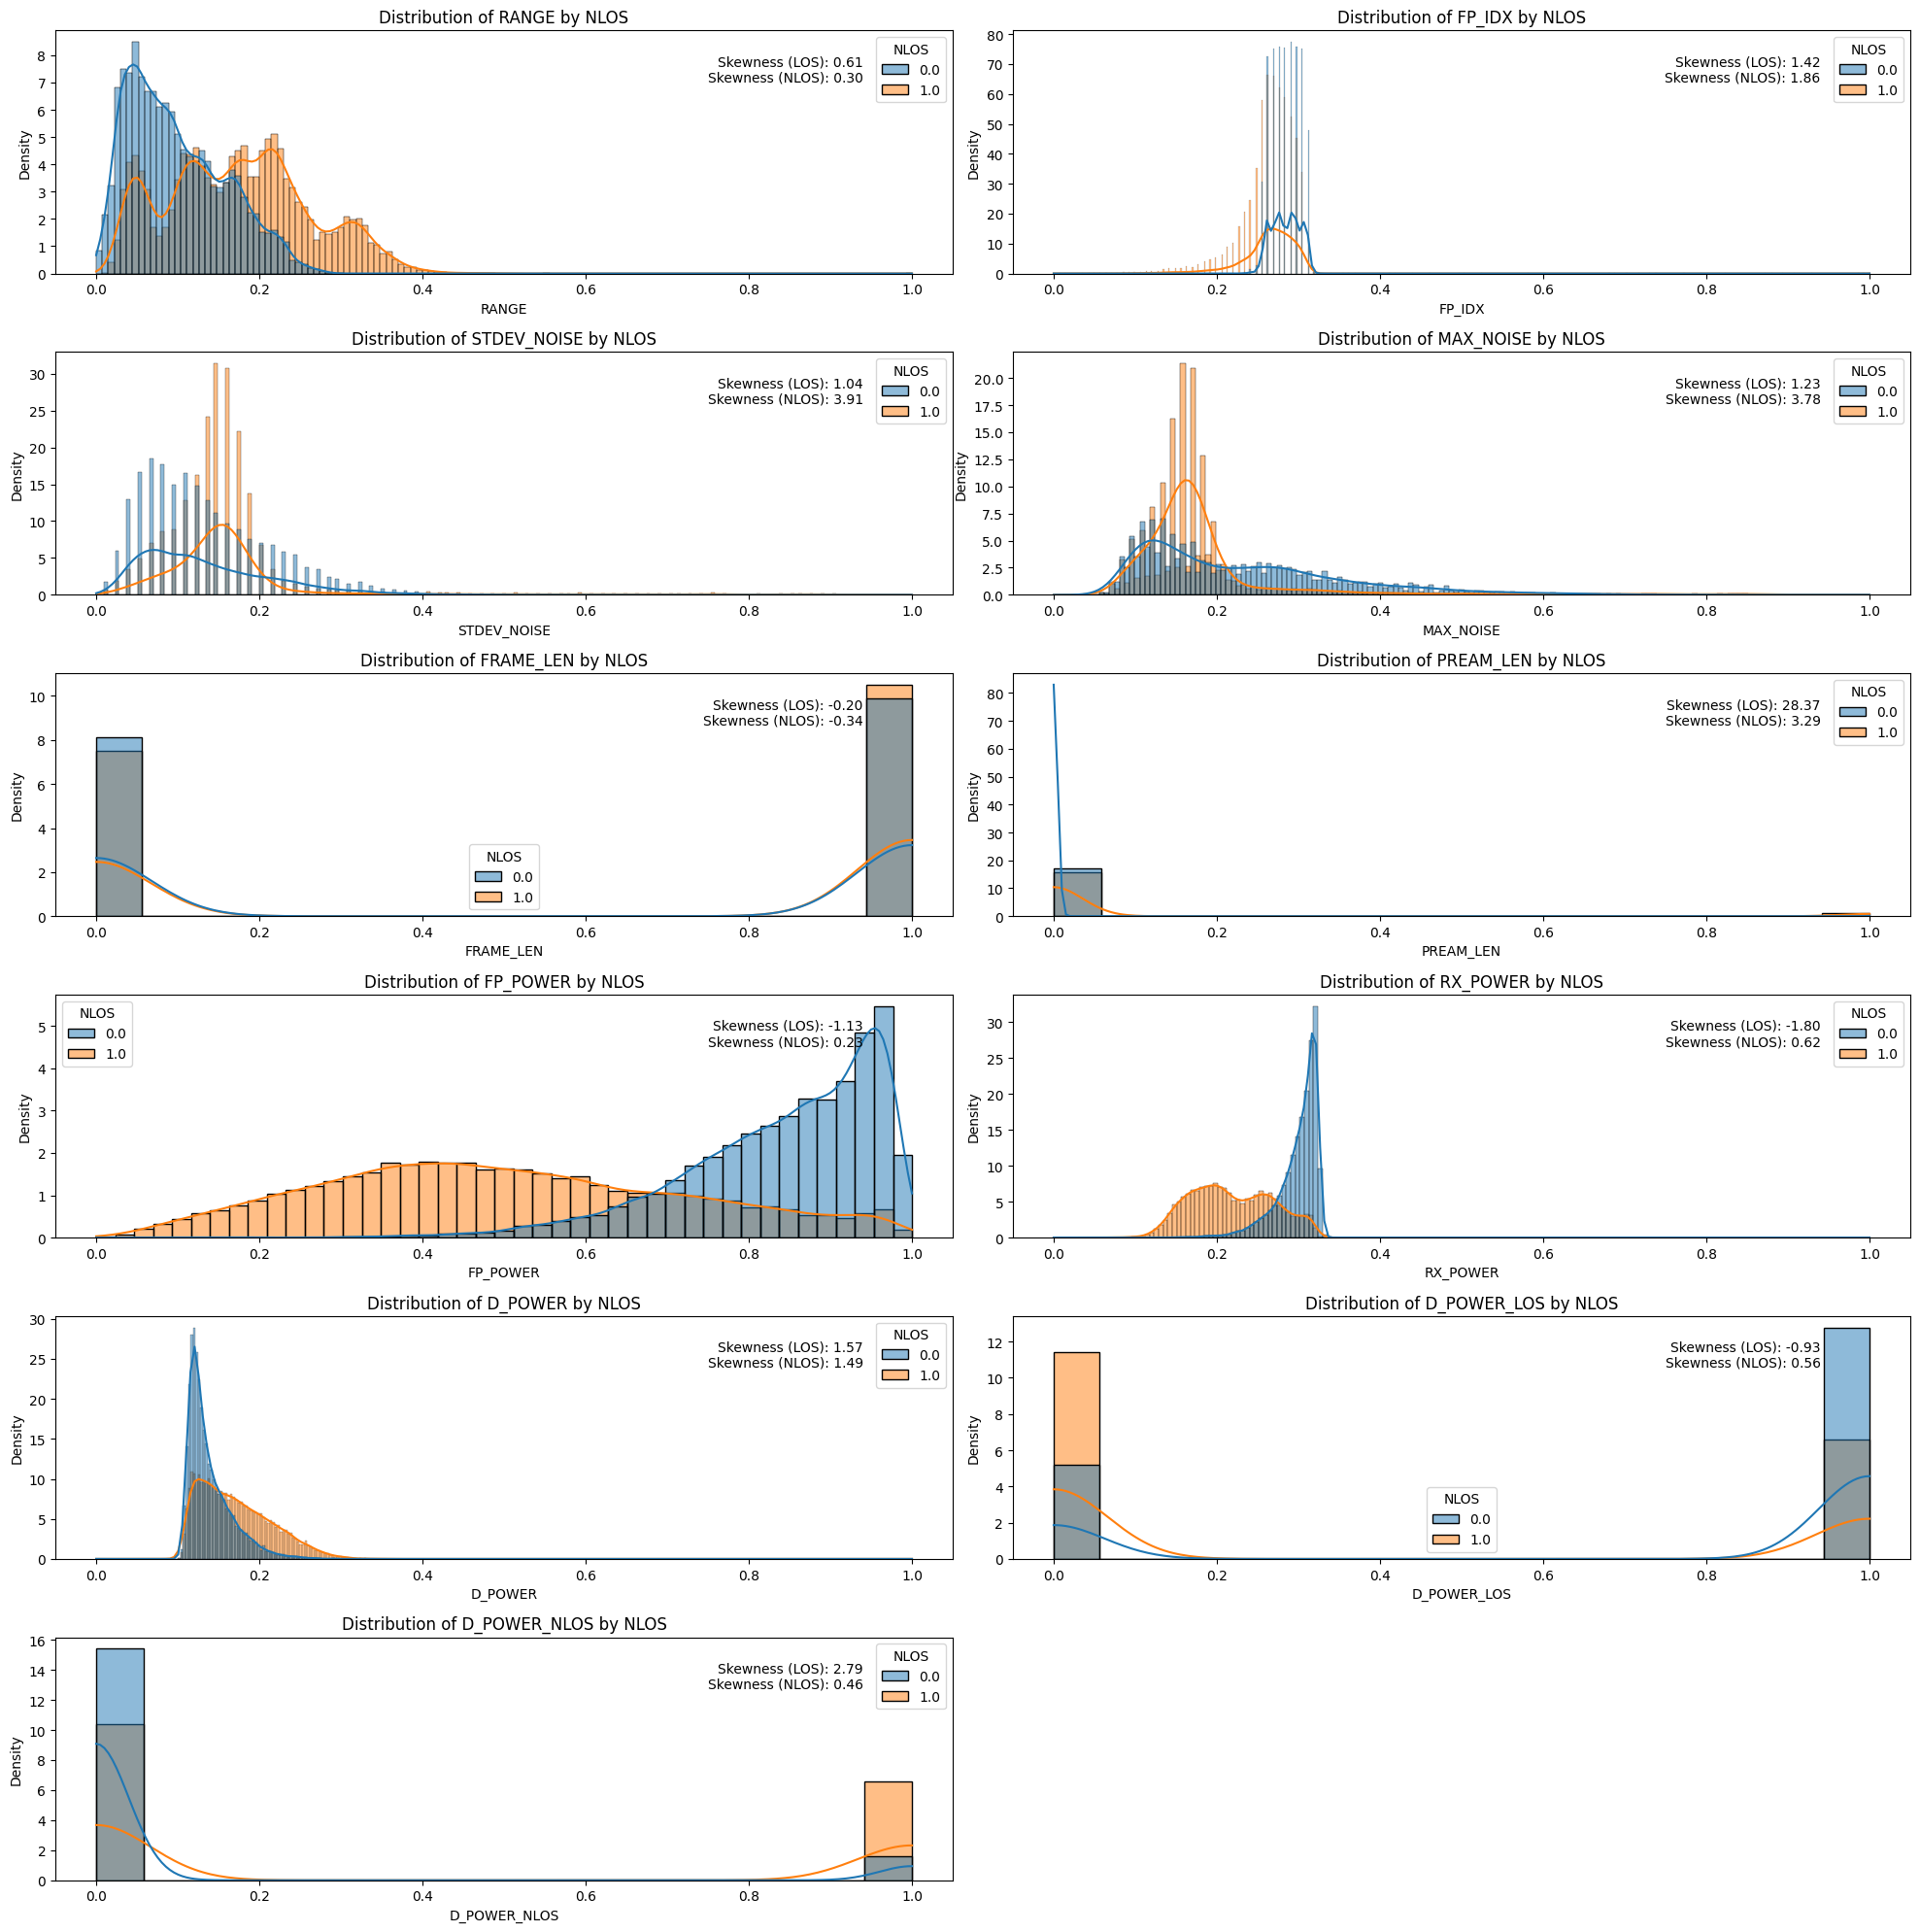

In [21]:
# Get non-class features
features = [i for i in df_noncir_mm_scaled.columns if i != 'NLOS']

# Plot histograms
print("Histograms for Min-Max scaled non-CIR dataset")
plot_histogram(df_noncir_mm_scaled, features)

#### Non-CIR Dataset (Standard scaled) histograms

Histograms for Standard scaled non-CIR dataset


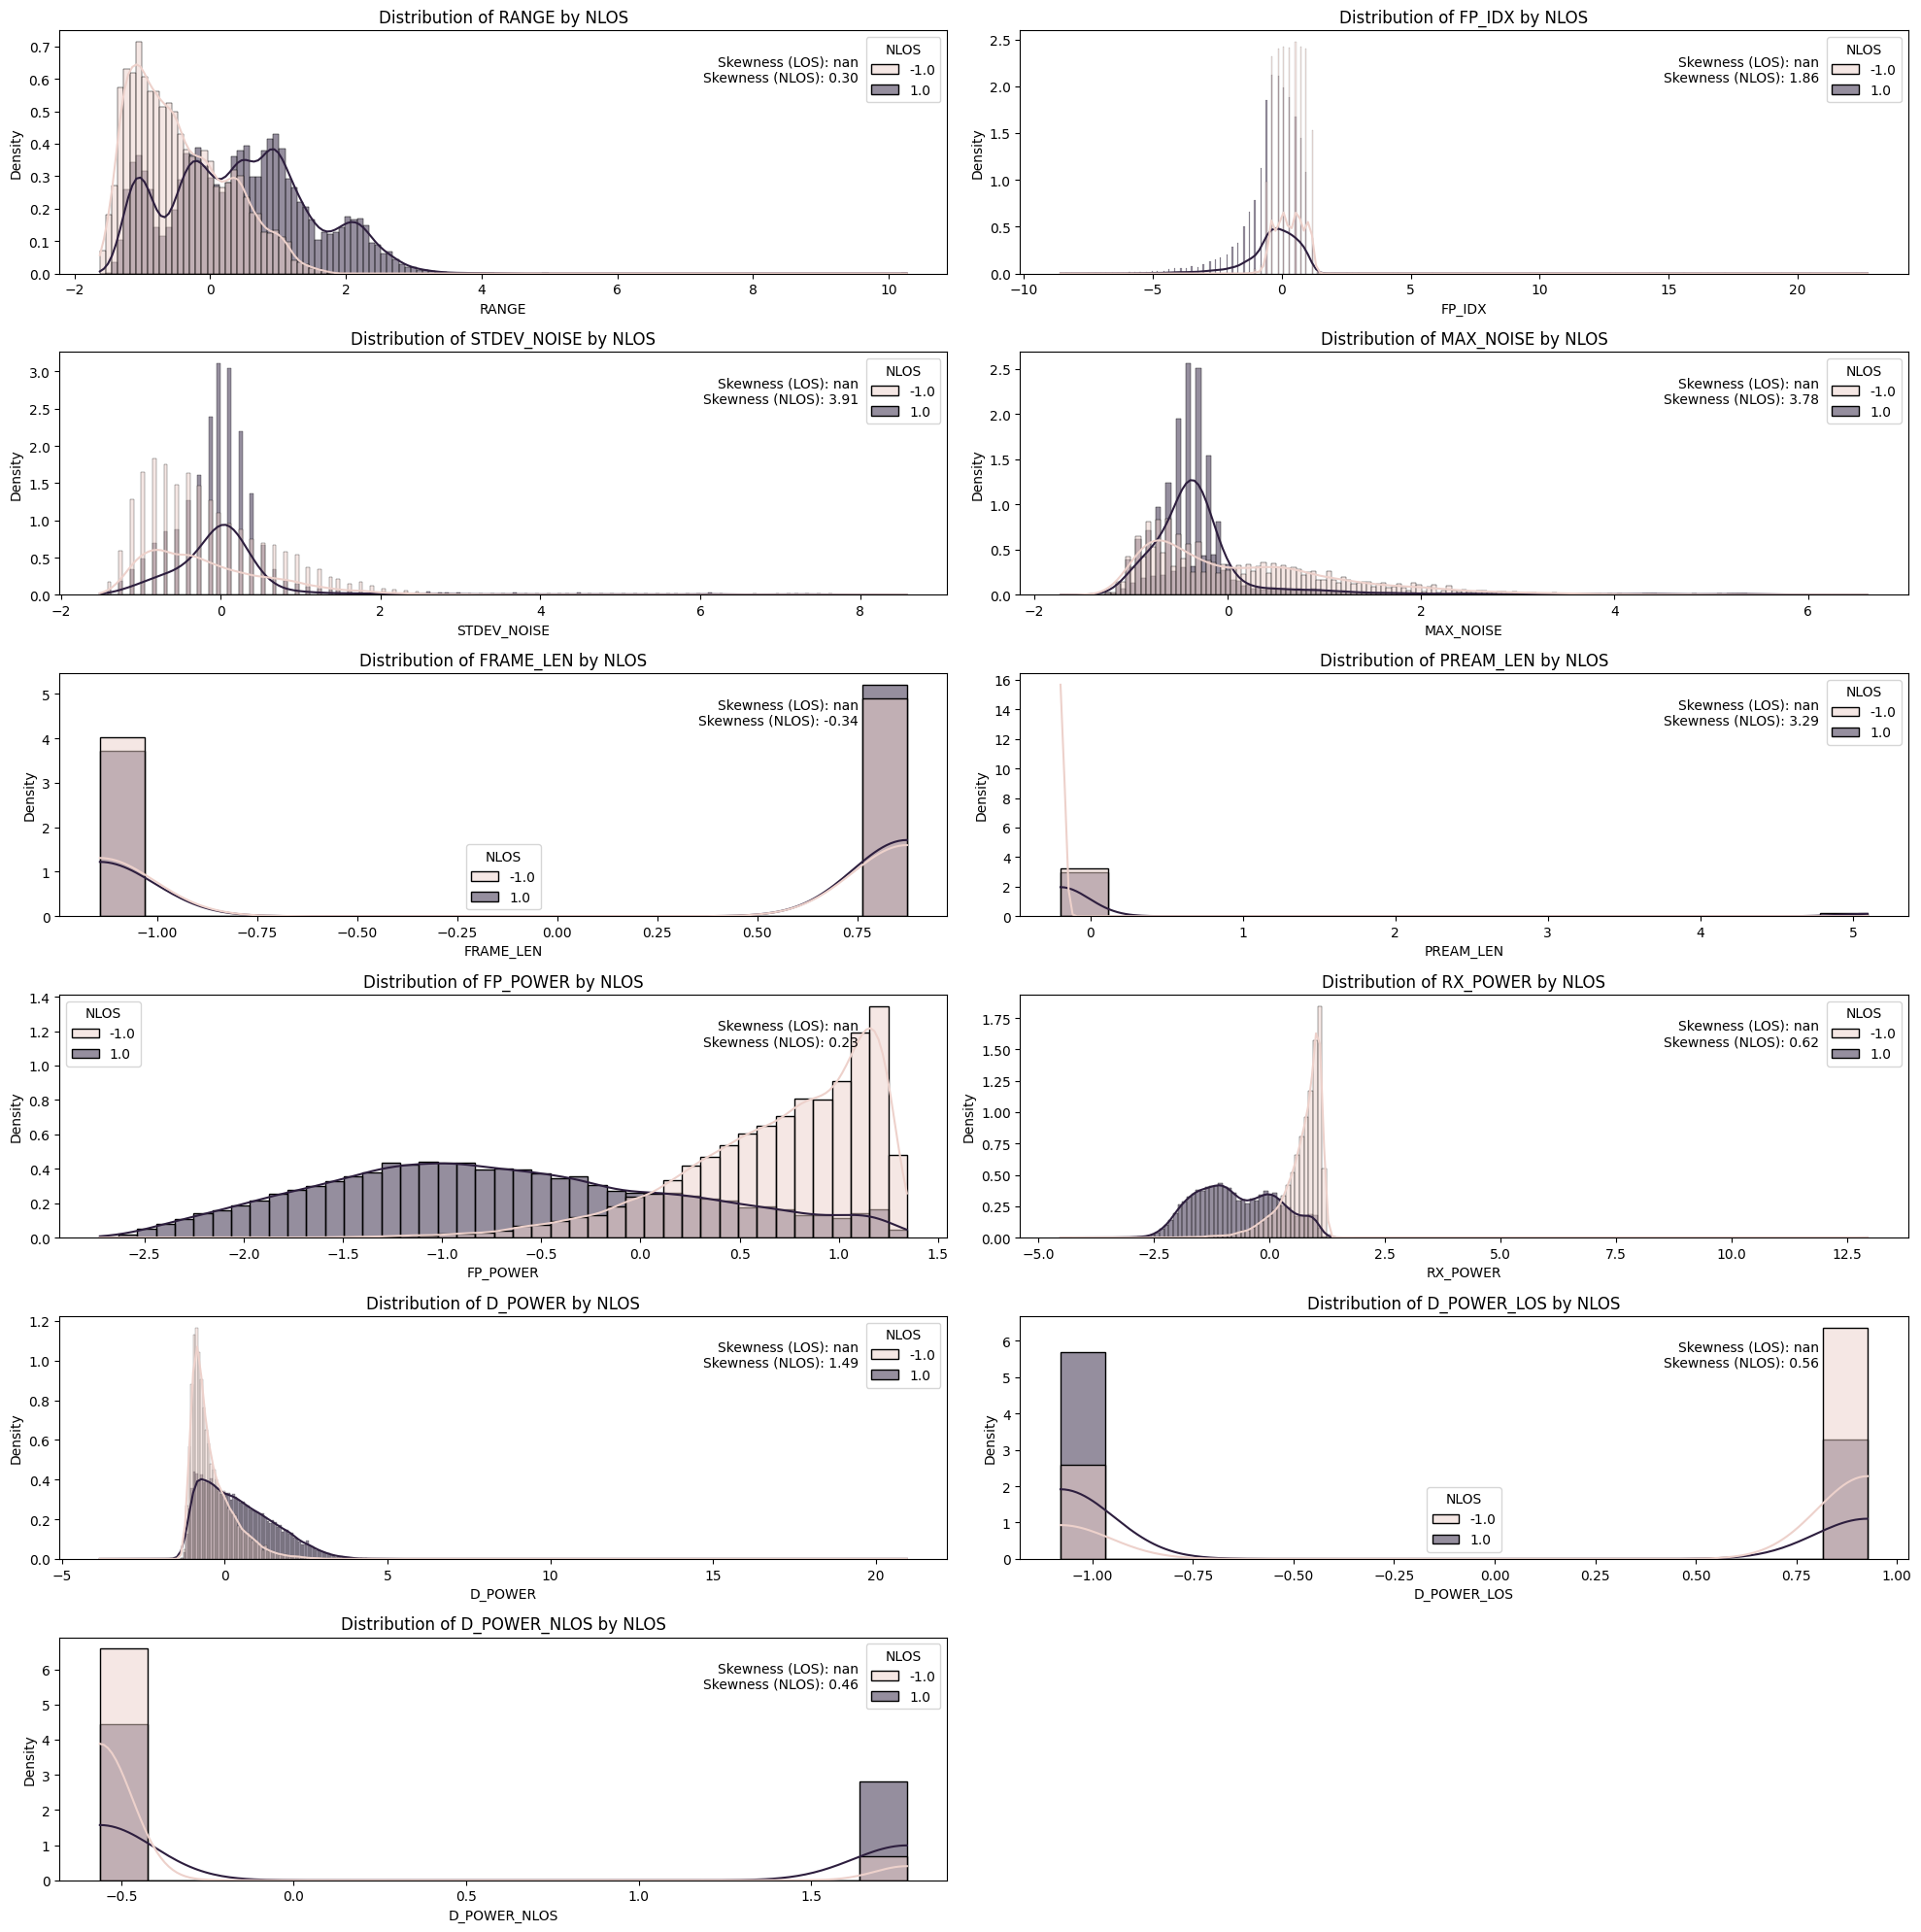

In [22]:
# Get non-class features
features = [i for i in df_noncir_standard_scaled.columns if i != 'NLOS']

# Plot histograms
print("Histograms for Standard scaled non-CIR dataset")
plot_histogram(df_noncir_standard_scaled, features)

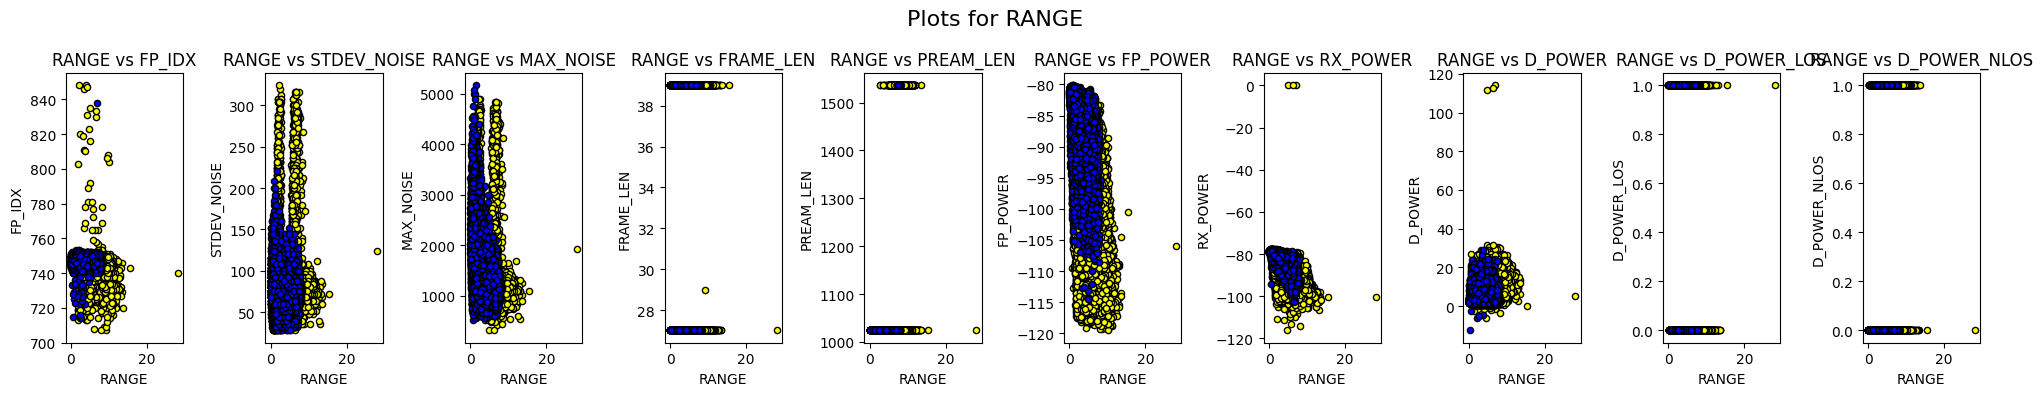

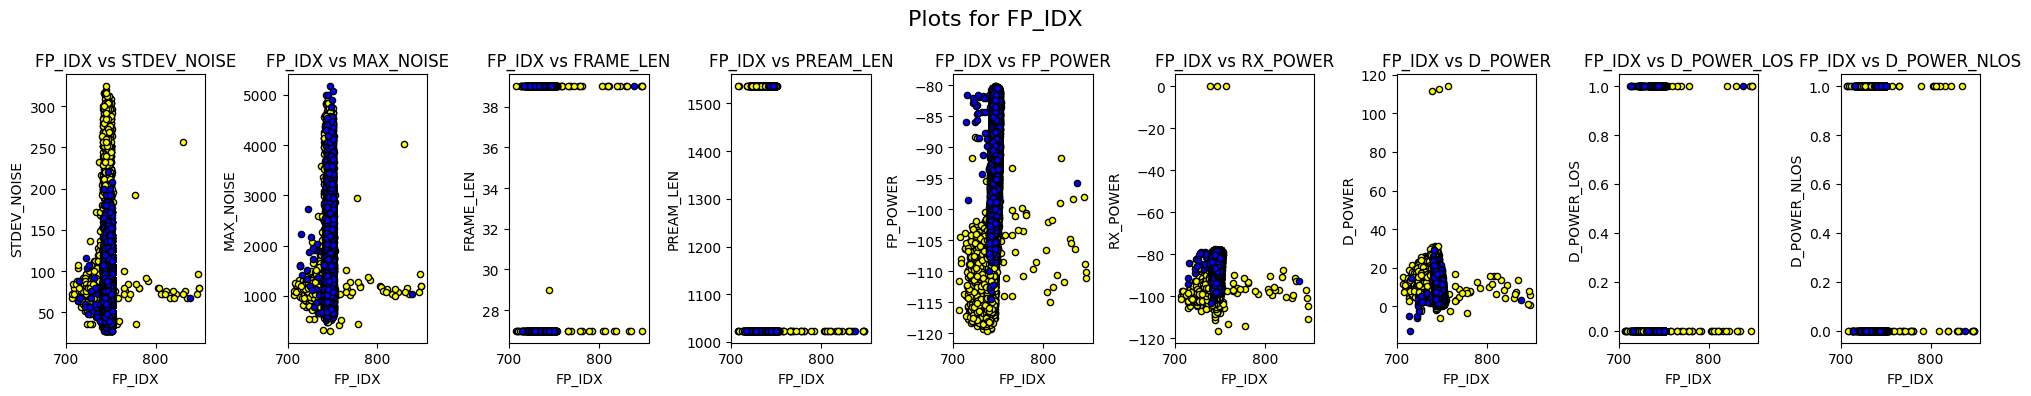

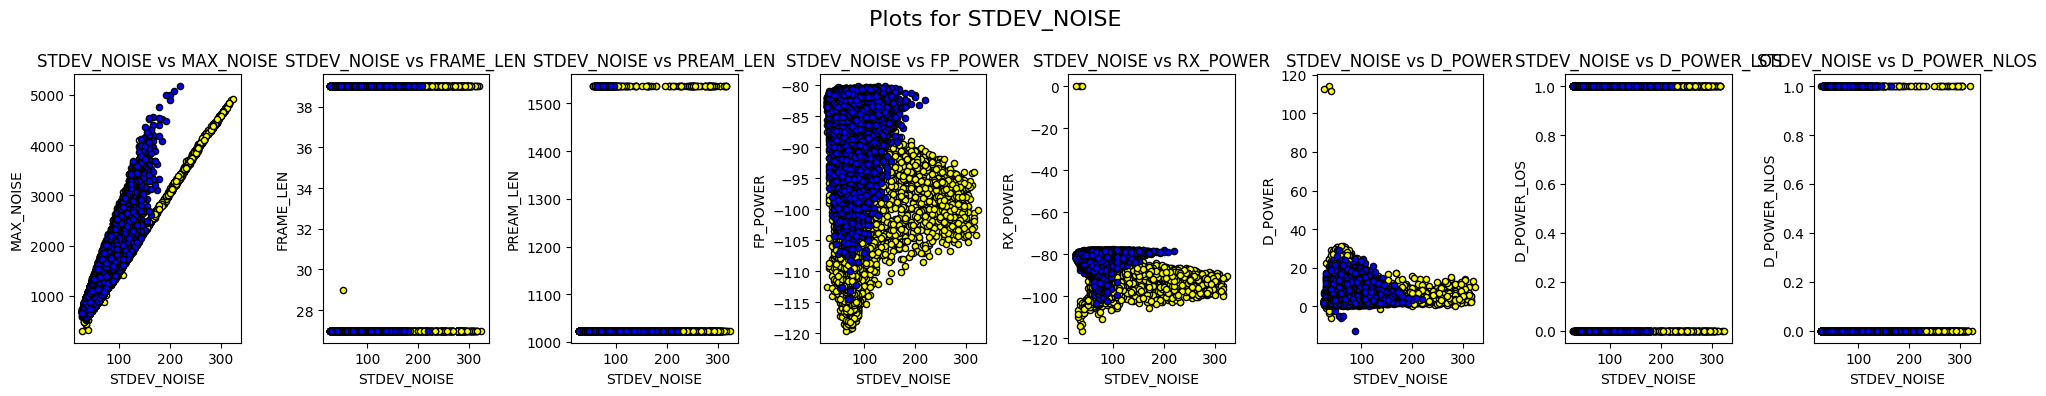

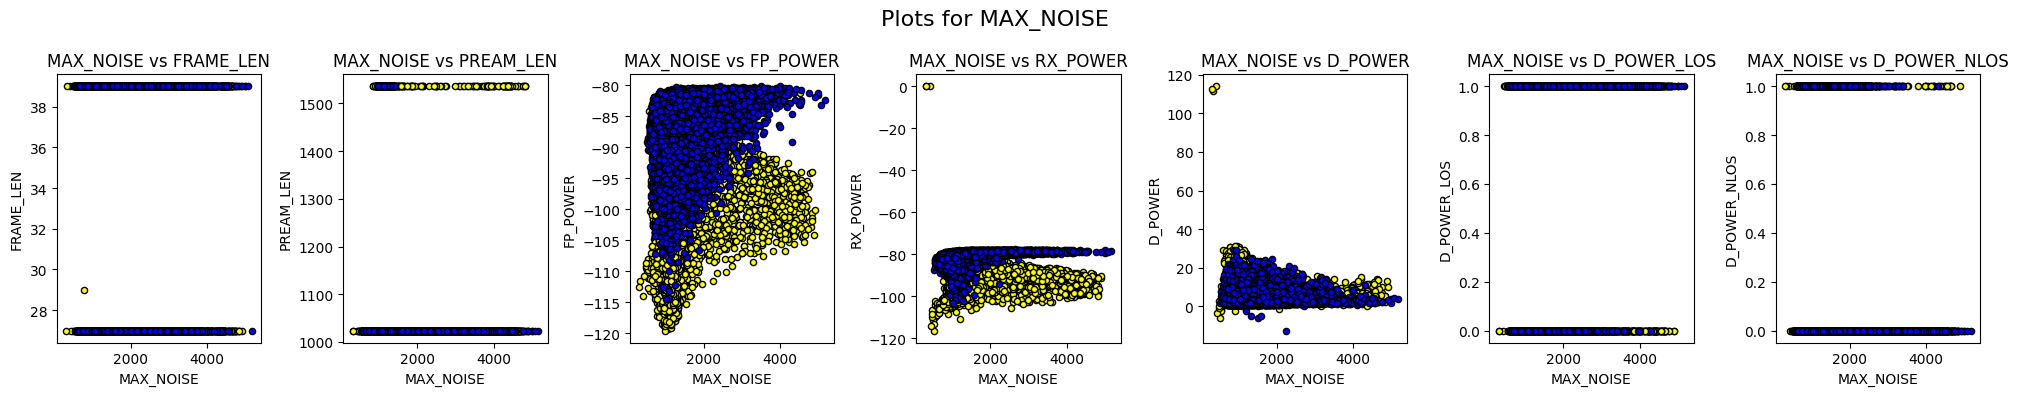

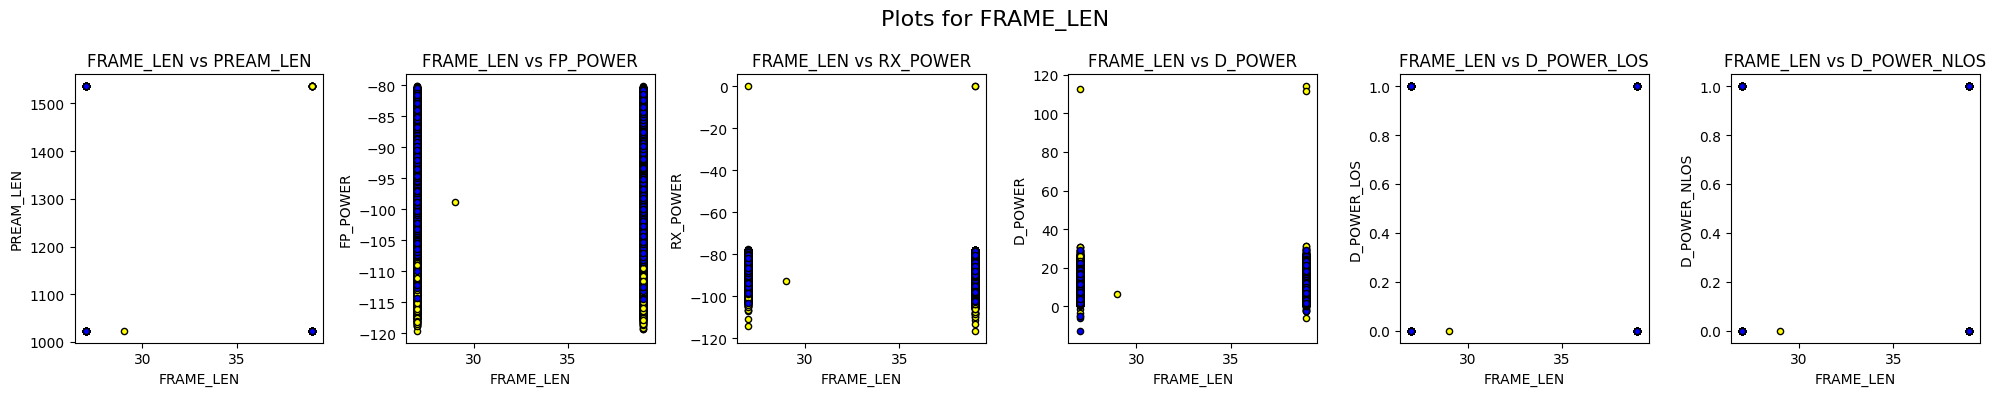

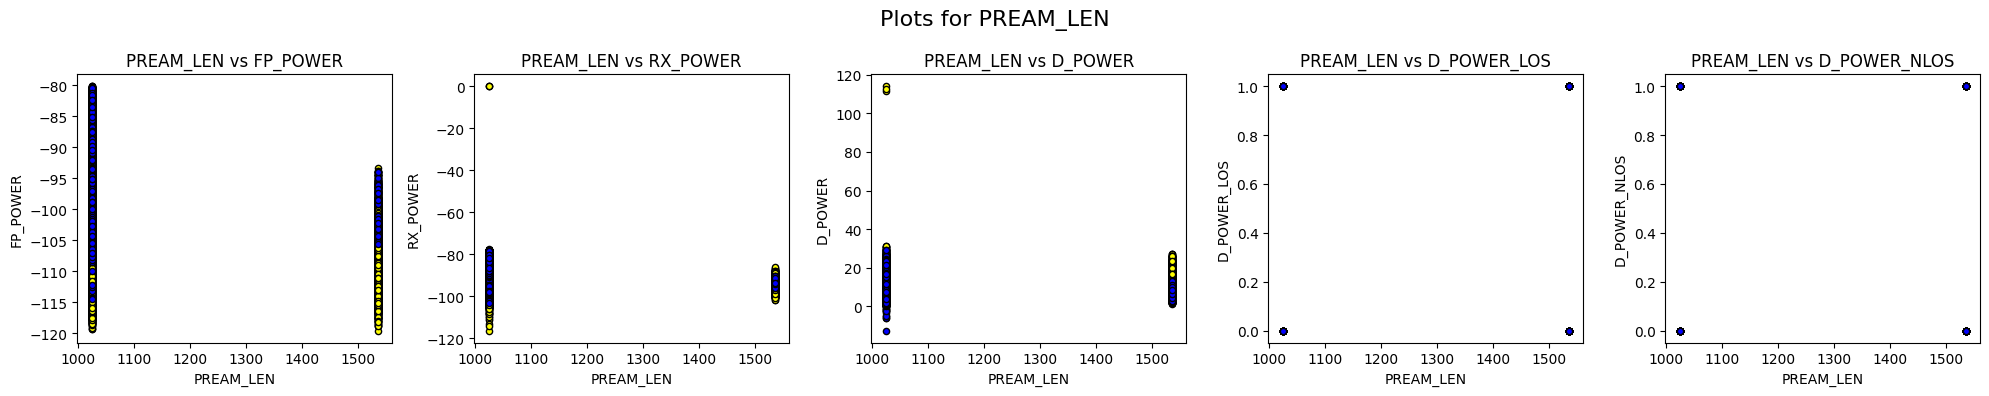

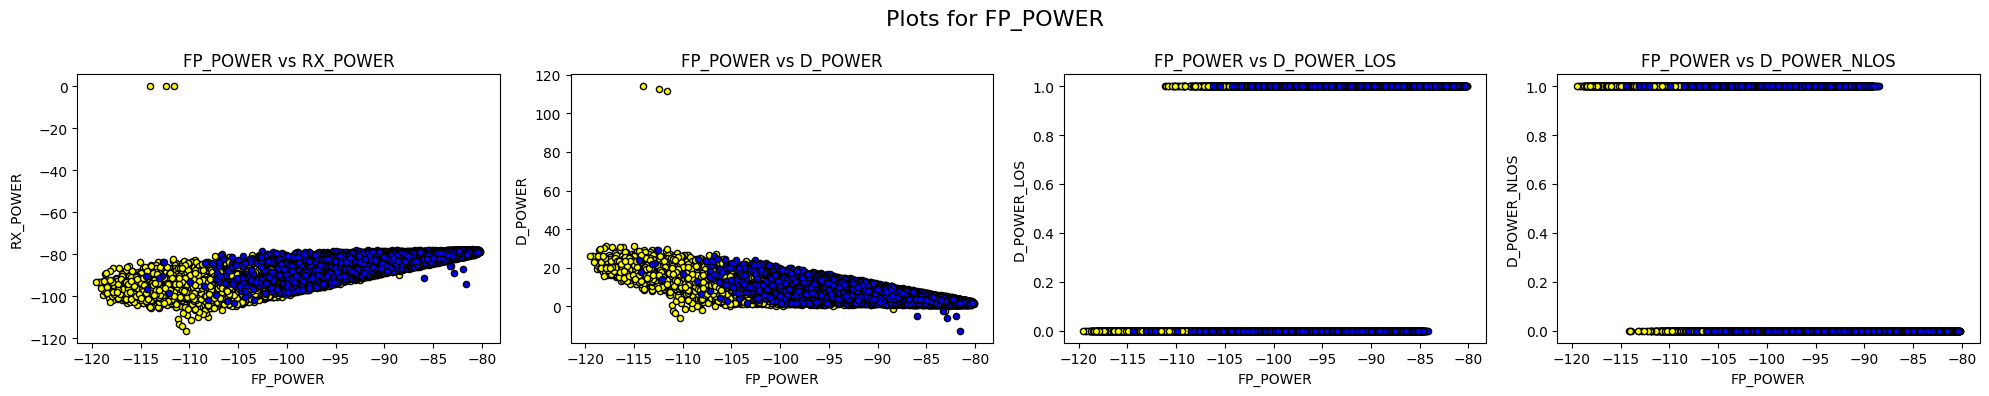

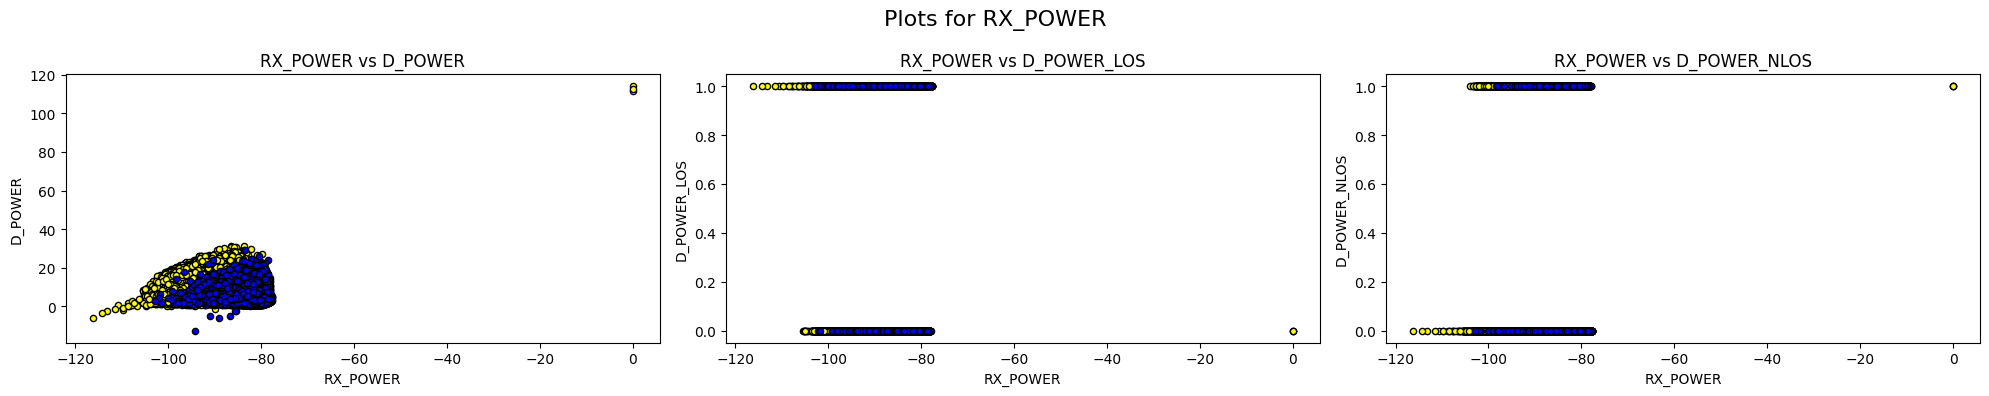

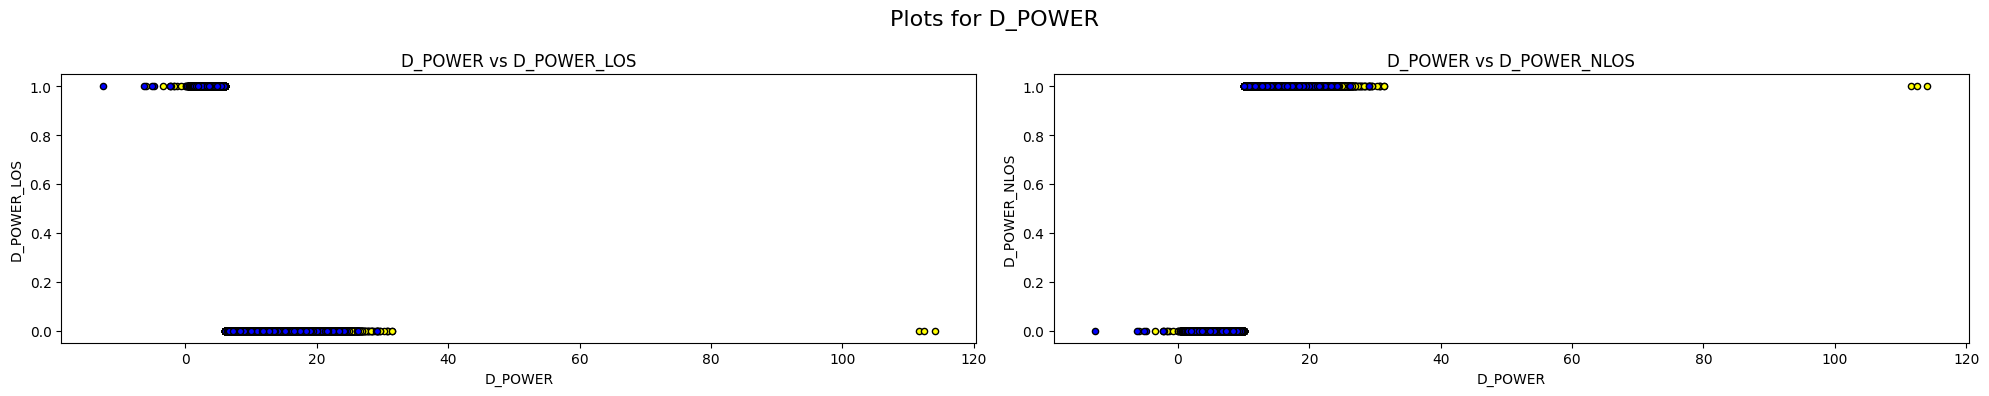

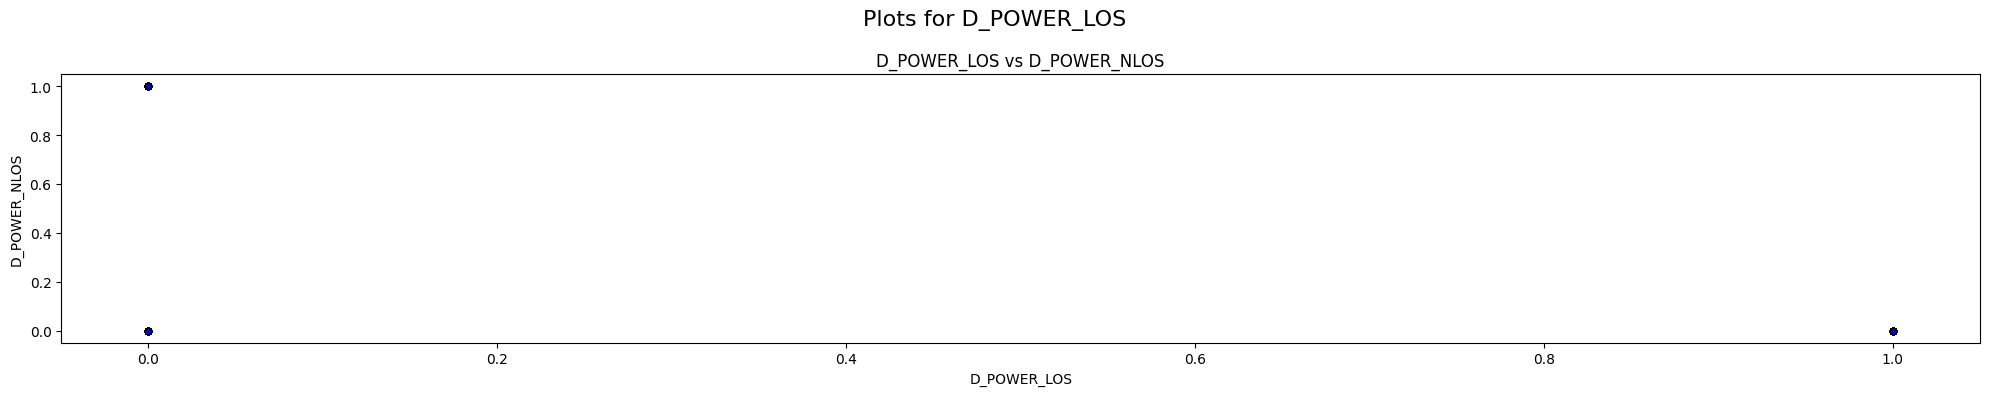

In [23]:
""" Examine relationship between features for LOS/NLOS """
import itertools

# Filters for each class
nlos_class = (df_noncir['NLOS'] == 1)
los_class = (df_noncir['NLOS'] == 0)

# Create dictionary of feature pair combinations, excluding NLOS
dict_combinations = {}
for combination in itertools.combinations(df_noncir.columns, 2):
    column1, column2 = combination
    if column1 not in dict_combinations:
        dict_combinations[column1] = []
    dict_combinations[column1].append((column1, column2))
del dict_combinations['NLOS']

# Plot each group of combinations separately
for column, combinations in dict_combinations.items():
    fig, axes = plt.subplots(1, len(combinations), figsize=(20, 4))  # Adjust figsize as needed
    fig.suptitle(f"Plots for {column}", fontsize=16)
    if len(combinations) == 1:
        axes = [axes]  # Ensure axes is a list to handle single subplot case
    for i, combination in enumerate(combinations):
        ax = axes[i]  # Access the axes
        ax.scatter(df_noncir[nlos_class][combination[0]], df_noncir[nlos_class][combination[1]], c="yellow", s=20, edgecolor='k')
        ax.scatter(df_noncir[los_class][combination[0]], df_noncir[los_class][combination[1]], c="blue", s=20, edgecolor='k')
        ax.set_xlabel(combination[0])
        ax.set_ylabel(combination[1])
        ax.set_title(f"{combination[0]} vs {combination[1]}")
    plt.tight_layout()
    plt.show()

In [35]:
for i in df_noncir.columns:
    print(i)

NLOS
RANGE
FP_IDX
STDEV_NOISE
MAX_NOISE
FRAME_LEN
PREAM_LEN
FP_POWER
RX_POWER
D_POWER
D_POWER_LOS
D_POWER_NLOS


#### Interpretation
- Find Feature v Feature that result in visible clusters

    For example, for STDEV_NOISE vs FP_POWER:
    Low  levels of  noise compared  to first  path amplitude have little impact on the timestamp  accuracy.  In  case  of  high noise values and NLOS  signal  path, first  path  can  be buried in the noise, which results in incorrect timestamp detection. With a higher absolute CIRE noise figure it is more likely that the quality of receive timestamp will be
poorer. High noise may mean that the real first path is irretrievably buried in the noise

    FP_AMP1, FP_AMP2 and FP_AMP3 are derived from FP_IDX (FP_INDEX). They are all 16-bit values that are part of reporting the magnitude of the leading edge signal seen in the accumulator data memory during the LDE algorithm’s analysis:
    - FP_AMP1: The amplitude of the sample reported in the FP_AMPL1 parameter is the magnitude of the accumulator tap at the index 1 beyond the integer portion of the rising edge FP_INDEX
    - FP_AMP2: The amplitude of the sample reported in the FP_AMPL2 parameter is the magnitude of the accumulator tap at the index 2 beyond the integer portion of the rising edge FP_INDEX.
    - FP_AMP3:  The amplitude of the sample reported in the FP_AMPL3 parameter is the magnitude of the accumulator tap at the index 3 beyond the integer portion of the rising edge FP_INDEX

- Features to be kept:
    - STDEV_NOISE
    - FP_IDX
    - FP_POWER
    - RX_POWER
    - D_POWER
    - D_POWER_LOS
    - D_POWER_NLOS
    - NLOS (Class)

- ????
    - RANGE
    - MAX_NOISE
    - FRAME_LEN
    - PREAM_LEN

In [24]:

# Add some metrics to compute threshold to determine variability of skewness for classification
pass

""" 
Kurtosis: Kurtosis measures the "tailedness" of the distribution. A high positive kurtosis indicates heavy tails (peakedness), while a negative kurtosis indicates light tails (flatness). You can use kurtosis as a metric to assess the peakedness of the distribution for each class and compare them. A significant difference in kurtosis between classes might indicate distinct separation.

Effect size measures: Effect size measures such as Cohen's d or Cliff's delta can quantify the magnitude of the difference between the two distributions. You can use these measures to compare the effect size of the difference between LOS and NLOS distributions for a feature. A large effect size suggests a substantial difference between the classes.

Overlap area: You can visually inspect the histograms of the two classes and calculate the overlap area between the distributions. A smaller overlap area indicates less ambiguity in classification based on that feature. You can use techniques like the Bhattacharyya coefficient or the area under the Receiver Operating Characteristic (ROC) curve to quantify the overlap.

Statistical tests: Conducting statistical tests such as the Kolmogorov-Smirnov test, Anderson-Darling test, or Mann-Whitney U test can help assess whether the distributions significantly differ between the two classes. You can use the p-value from these tests to determine if the distributions are distinct.

Domain knowledge: Consider the domain-specific knowledge and context of your problem. A threshold that makes sense in one context may not be appropriate in another. Consulting with domain experts can provide valuable insights into what constitutes a meaningful separation for your specific application.
"""

' \nKurtosis: Kurtosis measures the "tailedness" of the distribution. A high positive kurtosis indicates heavy tails (peakedness), while a negative kurtosis indicates light tails (flatness). You can use kurtosis as a metric to assess the peakedness of the distribution for each class and compare them. A significant difference in kurtosis between classes might indicate distinct separation.\n\nEffect size measures: Effect size measures such as Cohen\'s d or Cliff\'s delta can quantify the magnitude of the difference between the two distributions. You can use these measures to compare the effect size of the difference between LOS and NLOS distributions for a feature. A large effect size suggests a substantial difference between the classes.\n\nOverlap area: You can visually inspect the histograms of the two classes and calculate the overlap area between the distributions. A smaller overlap area indicates less ambiguity in classification based on that feature. You can use techniques like th

Correlation Matrix against features excluding the individual CIR data, drop those above 0.7 or under -0.7

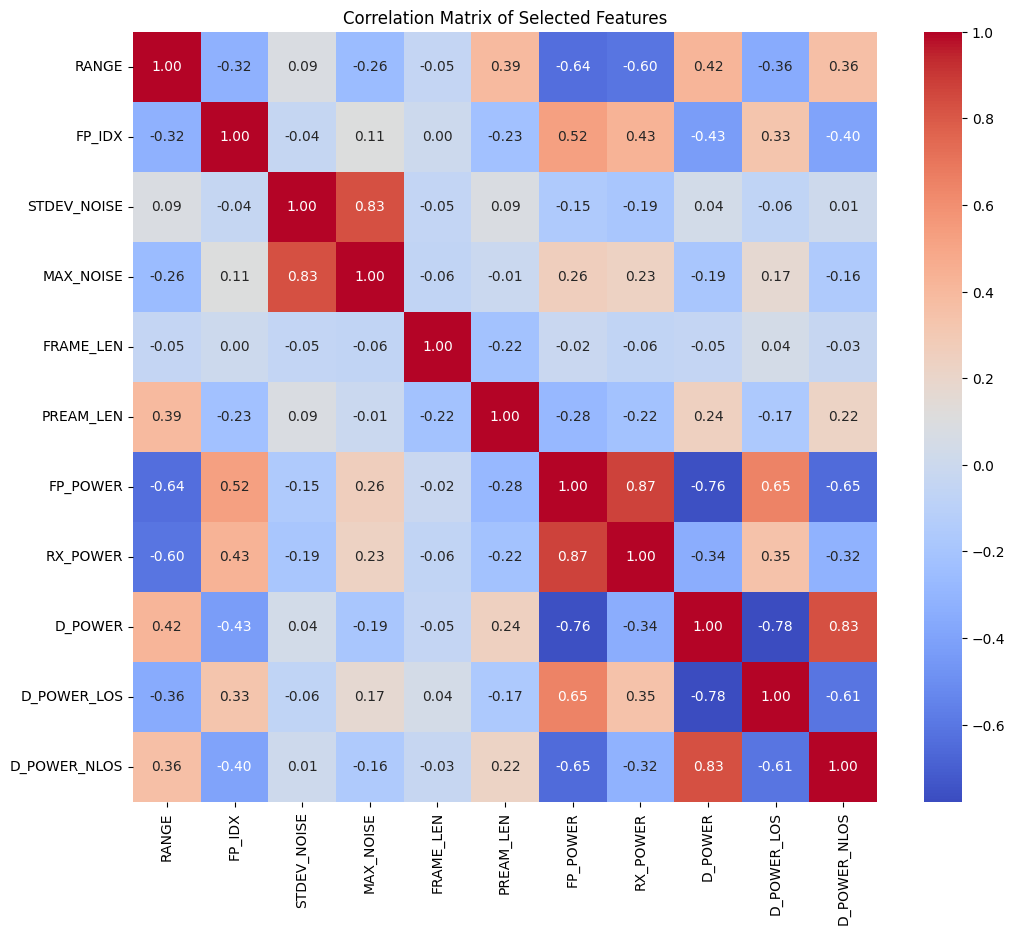

Pairs of features with high correlation coefficients:
STDEV_NOISE - MAX_NOISE: 0.83
FP_POWER - RX_POWER: 0.87
D_POWER - D_POWER_NLOS: 0.83


In [24]:
corr_df = df_noncir.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Find pairs of features with high correlation coefficients
threshold = 0.8  # Set a threshold for high correlation
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Pairs of features with high correlation coefficients:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("No pairs of features with high correlation coefficients found.")

Decision Tree to identify which feature is important

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = df_noncir.drop(columns='NLOS')
y = df_noncir['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df

Feature  Importance
7       RX_POWER    0.361069
6       FP_POWER    0.220380
0          RANGE    0.166078
3      MAX_NOISE    0.090428
8        D_POWER    0.069087
2    STDEV_NOISE    0.039011
1         FP_IDX    0.030703
9    D_POWER_LOS    0.009204
10  D_POWER_NLOS    0.006856
4      FRAME_LEN    0.006689
5      PREAM_LEN    0.000497

As seen from the df also, the CH, bitrate, PRFR, FRAME_LEN, PREAM_LEN are close to a common constant and thus also no feature importance of it. FP_IDX prove to be of low imporatance too.

#### We can now either drop all those unimportant or do feature engineering

In [47]:
df_original['FRAME_LEN'].value_counts()

FRAME_LEN
39.0    23806
27.0    18193
29.0        1
Name: count, dtype: int64

In [48]:
df_original['PREAM_LEN'].value_counts()

PREAM_LEN
1024.0    40443
1536.0     1557
Name: count, dtype: int64

In [26]:
# Drop
df_noncir_trimmed = df_noncir.drop(['FRAME_LEN', 'PREAM_LEN'], axis=1)
df_noncir_trimmed

NLOS  RANGE  FP_IDX  STDEV_NOISE  MAX_NOISE    FP_POWER    RX_POWER  \
0       0.0   4.88   744.0        108.0     1645.0  -94.596003  -83.242593   
1       0.0   0.97   746.0         48.0     1189.0  -82.200844  -78.924940   
2       0.0   1.07   745.0        116.0     3111.0  -81.821606  -78.433506   
3       0.0   0.90   751.0         60.0     1414.0  -82.833613  -78.878945   
4       0.0   2.79   744.0         44.0      743.0  -86.455578  -82.764816   
...     ...    ...     ...          ...        ...         ...         ...   
41995   1.0   4.25   745.0         80.0     1188.0 -109.446217  -94.681363   
41996   1.0   2.25   744.0        204.0     3126.0 -103.265570  -88.436032   
41997   0.0   2.48   750.0         72.0     1068.0  -93.474549  -81.707347   
41998   1.0   6.87   738.0         72.0     1071.0 -114.306118  -87.757599   
41999   1.0   6.02   742.0         68.0     1028.0 -107.508017 -100.916635   

         D_POWER  D_POWER_LOS  D_POWER_NLOS  
0      11.353411            0             1  
1       3.275904            1             0  
2       3.388100            1             0  
3       3.954668            1             0  
4       3.690762            1             0  
...          ...          ...           ...  
41995  14.764854            0             1  
41996  14.829538            0             1  
41997  11.767202            0             1  
41998  26.548519            0             1  
41999   6.591382            0             0  

[42000 rows x 10 columns]

##### Drop all that is used for transformation. And drop all those that has low importance.

In [ ]:
no_cir_df_transform = no_cir_df_rxsignal_cleaned.drop(['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)

no_cir_df_transform

NLOS  RANGE  FP_IDX  STDEV_NOISE  MAX_NOISE  FP_POWER_LEVEL    RX_LEVEL
0       0.0   4.88   744.0        108.0     1645.0      -94.596003  -83.242593
1       0.0   0.97   746.0         48.0     1189.0      -82.200844  -78.924940
2       0.0   1.07   745.0        116.0     3111.0      -81.821606  -78.433506
3       0.0   0.90   751.0         60.0     1414.0      -82.833613  -78.878945
4       0.0   2.79   744.0         44.0      743.0      -86.455578  -82.764816
...     ...    ...     ...          ...        ...             ...         ...
41995   1.0   4.25   745.0         80.0     1188.0     -109.446217  -94.681363
41996   1.0   2.25   744.0        204.0     3126.0     -103.265570  -88.436032
41997   0.0   2.48   750.0         72.0     1068.0      -93.474549  -81.707347
41998   1.0   6.87   738.0         72.0     1071.0     -114.306118  -87.757599
41999   1.0   6.02   742.0         68.0     1028.0     -107.508017 -100.916635

[41997 rows x 7 columns]

First 15 feature we have made into two type of dataset.

df_noncir_trimmed = Only unimportant is removed.


no_cir_df_transform = feature transformation and unimportant is removed

### Lets settle all the CIR data next

In [29]:
# Get all the CIR Data
cir_df = df_original.iloc[:, 15:]
cir_df

CIR0   CIR1   CIR2   CIR3    CIR4   CIR5   CIR6   CIR7   CIR8   CIR9  \
0      733.0  363.0  497.0  618.0   387.0  703.0  536.0  321.0  298.0  156.0   
1       71.0  206.0  182.0  277.0   252.0  336.0  259.0  305.0  120.0  185.0   
2      348.0  293.0  334.0  336.0   246.0  186.0  475.0  197.0  447.0  103.0   
3      151.0  177.0  496.0  193.0   200.0  298.0  117.0  251.0  308.0  308.0   
4      127.0   81.0  340.0  134.0   297.0  269.0  291.0  201.0  207.0  189.0   
...      ...    ...    ...    ...     ...    ...    ...    ...    ...    ...   
41995  173.0   60.0  216.0  348.0   384.0  182.0   96.0  252.0  271.0  100.0   
41996  392.0  354.0  402.0  535.0  1146.0  283.0  972.0  562.0  117.0  466.0   
41997  309.0  295.0  242.0  301.0   187.0  144.0  118.0  171.0  291.0   80.0   
41998   94.0  244.0  256.0  250.0   158.0  248.0  213.0  194.0  286.0  160.0   
41999  294.0   82.0  247.0  249.0   187.0  268.0  412.0  201.0  220.0  475.0   

       ...  CIR1006  CIR1007  CIR1008  CIR1009  CIR1010  CIR1011  CIR1012  \
0      ...    408.0    713.0    446.0    273.0    340.0    494.0    378.0   
1      ...    224.0     31.0     62.0    267.0    102.0    359.0    156.0   
2      ...    250.0    419.0    311.0    185.0    274.0    258.0    212.0   
3      ...    318.0    191.0     58.0    276.0    249.0    298.0     64.0   
4      ...    272.0    129.0    264.0     77.0    104.0    313.0    234.0   
...    ...      ...      ...      ...      ...      ...      ...      ...   
41995  ...    198.0    335.0    291.0    138.0    176.0    224.0    210.0   
41996  ...   1176.0    341.0    314.0    445.0    332.0   1000.0   1337.0   
41997  ...    219.0    246.0     71.0    374.0    183.0     16.0    160.0   
41998  ...    171.0    182.0    177.0     74.0    278.0    204.0    150.0   
41999  ...    507.0    187.0    187.0    377.0    269.0    191.0    159.0   

       CIR1013  CIR1014  CIR1015  
0        546.0     30.0    256.0  
1        132.0     79.0      0.0  
2        305.0     56.0    256.0  
3        100.0    112.0      0.0  
4         74.0    165.0      0.0  
...        ...      ...      ...  
41995    205.0    289.0      0.0  
41996    304.0    922.0    256.0  
41997    266.0    269.0    256.0  
41998    181.0    145.0      0.0  
41999    276.0    407.0      0.0  

[42000 rows x 1016 columns]

##### Lets try to aggregate the data method

In [30]:
# AGGREGATION
######################
# Peak Value
new_cir_df = pd.DataFrame({'CIR_PEAK_VALUE': cir_df.max(axis=1)})

# Energy Sum
new_cir_df['CIR_ENERGY_SUM'] = cir_df.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements
N = 100
early_cir_df = cir_df.iloc[:, :N]
new_cir_df['CIR_EARLY_ENERGY'] = early_cir_df.sum(axis=1)


In [31]:
# AGGREGATION
######################
# Mean Value
new_cir_df['CIR_MEAN'] = cir_df.mean(axis=1)    

# Variance
new_cir_df['CIR_VARIANCE'] = cir_df.var(axis=1)

# Skewness
new_cir_df['CIR_SKEWNESS'] = cir_df.skew(axis=1)

# Kurtosis
new_cir_df['CIR_KURTOSIS'] = cir_df.kurtosis(axis=1)

# Display the new features to verify

### Outlier Management (to be shifted to another notebook)
- Focus on non-CIR data
- Focus on CIR data

In [41]:
# Get values that only occur once (potential outliers)
print("Values that only appear once in each feature (potential outliers)\n")

# Ignore these features (class and derived features which will have inherent single values due to computations)
list_ignore = ['NLOS', 'FP_POWER', 'RX_POWER', 'D_POWER']

for column in df_noncir.columns:
    if(column not in list_ignore):
        list_single_occurrence_values = df_noncir[column].value_counts()[df_noncir[column].value_counts() == 1].index.tolist()
        total_values = len(list_single_occurrence_values)
        if(total_values > 0):
            print(f"{column} ({total_values}):\n{list_single_occurrence_values}", end='\n\n')

Values that only appear once in each feature (potential outliers)

RANGE (72):
[13.1, 11.11, 11.05, 10.57, 12.2, 11.82, 13.13, 11.94, 11.86, 15.43, 12.42, 11.89, 11.09, 12.62, 12.46, 12.49, 11.21, 11.81, 10.8, 11.12, 10.89, 10.71, 12.05, 11.33, 11.87, 10.88, 13.58, 12.57, 11.74, 11.34, 0.04, 10.64, 12.23, 10.69, 9.93, 11.01, 10.79, 13.0, 11.03, 11.23, 13.5, 11.61, 11.75, 13.06, 11.26, 11.72, 10.6, 11.02, 12.24, 10.81, 11.08, 11.49, 12.77, 12.47, 11.22, 10.86, 28.02, 10.41, 11.7, 11.95, 11.88, 13.48, 11.44, 11.17, 12.25, 12.91, 11.77, 11.55, 0.0, 10.37, 13.04, 10.56]

FP_IDX (28):
[831.0, 811.0, 806.0, 777.0, 759.0, 810.0, 712.0, 820.0, 708.0, 847.0, 823.0, 789.0, 819.0, 846.0, 758.0, 835.0, 804.0, 803.0, 792.0, 816.0, 808.0, 766.0, 833.0, 830.0, 757.0, 838.0, 755.0, 772.0]

STDEV_NOISE (2):
[320.0, 324.0]

MAX_NOISE (724):
[4700.0, 4839.0, 3904.0, 3744.0, 4399.0, 3064.0, 3188.0, 4141.0, 4367.0, 3464.0, 3298.0, 3843.0, 3818.0, 2319.0, 3342.0, 4371.0, 3197.0, 4540.0, 3072.0, 3806.0, 584.

Anomaly Detection using Mahalanobis Distancing

In [ ]:
new_cir_df['CIR_MEAN']

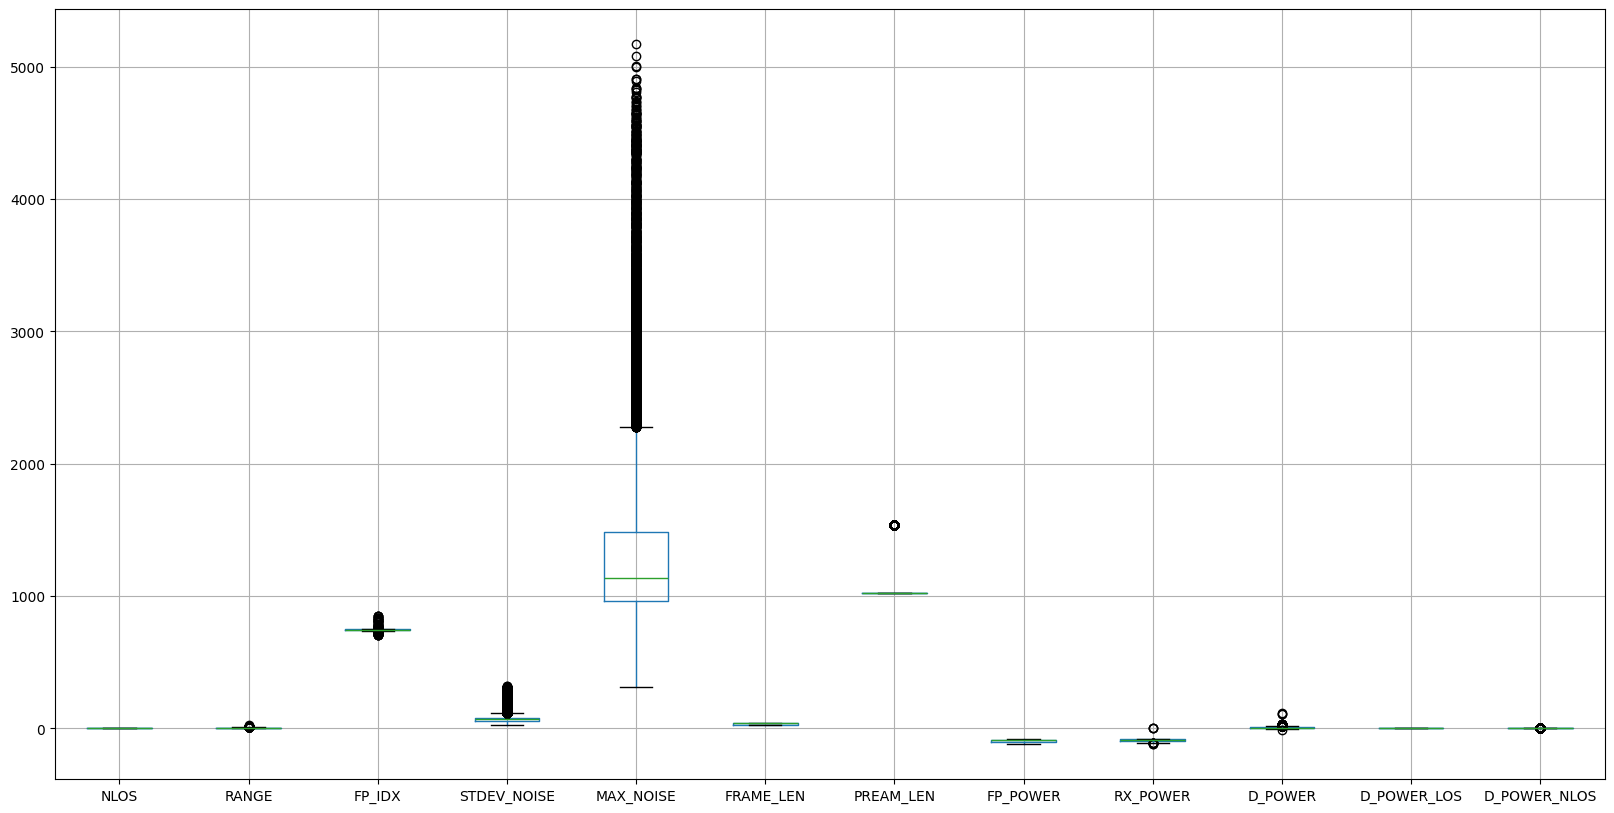

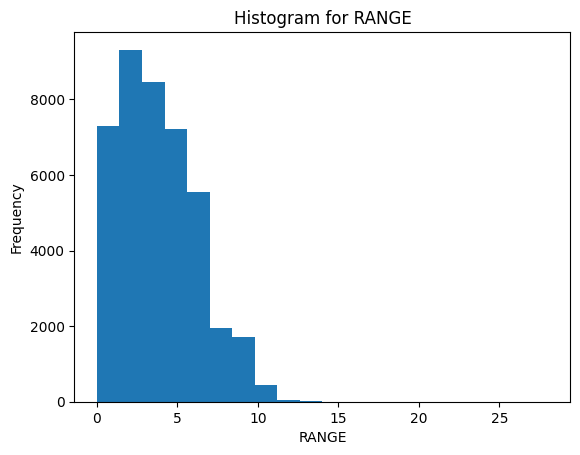

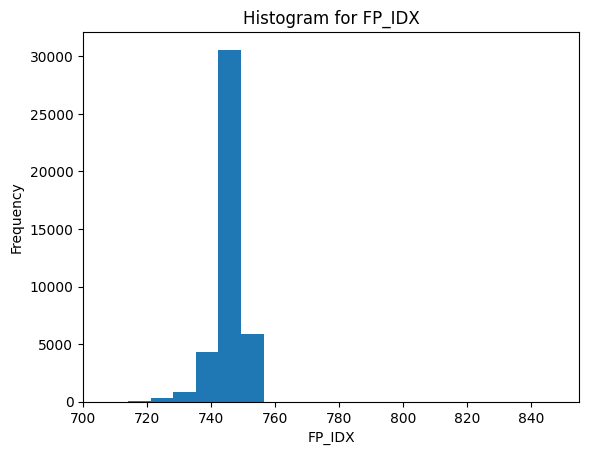

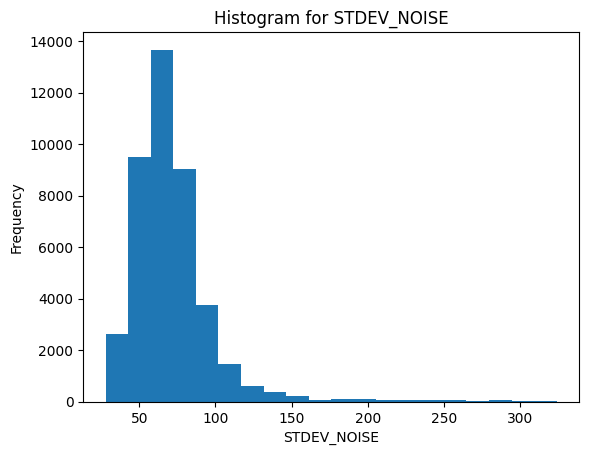

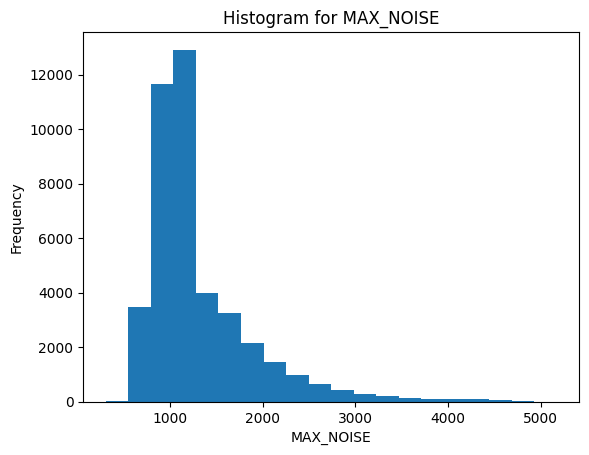

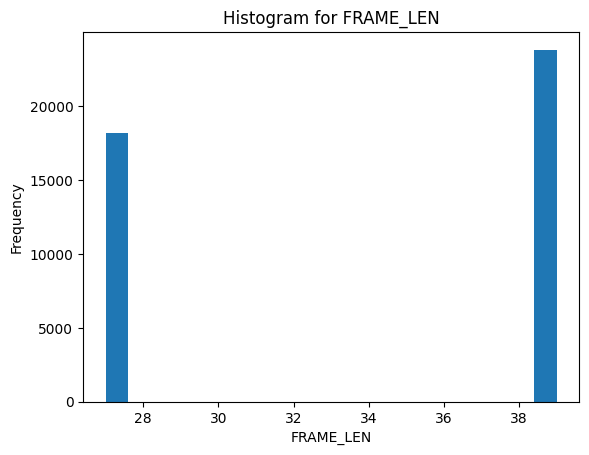

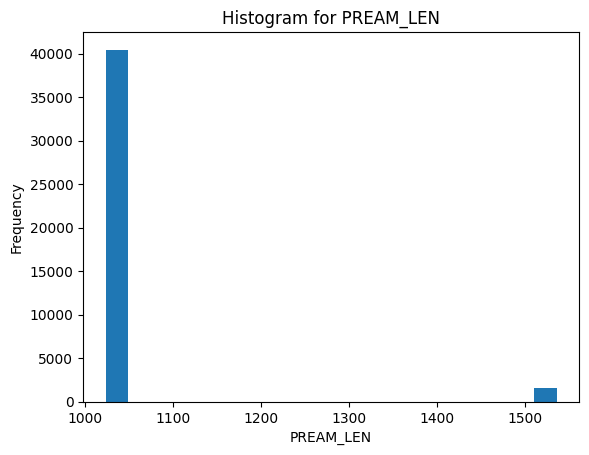

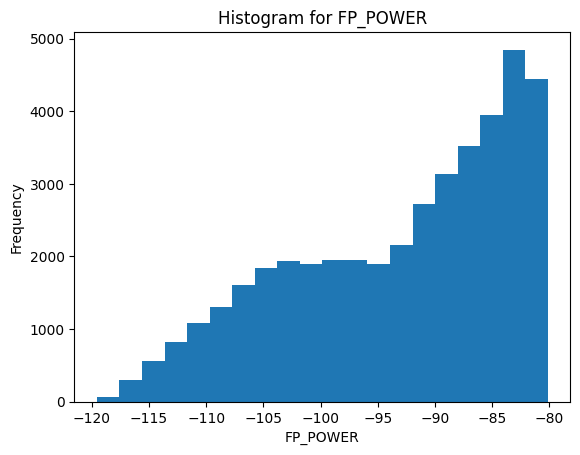

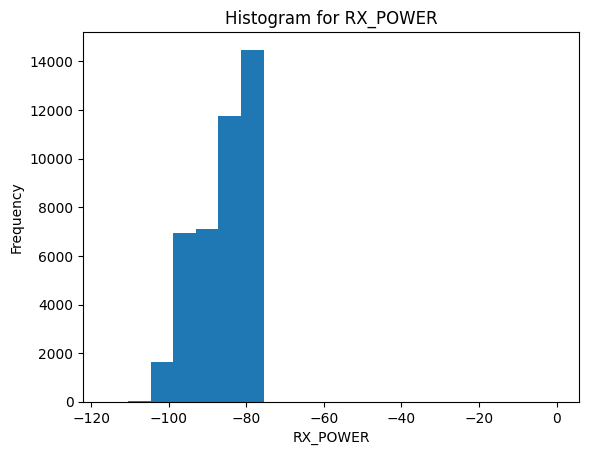

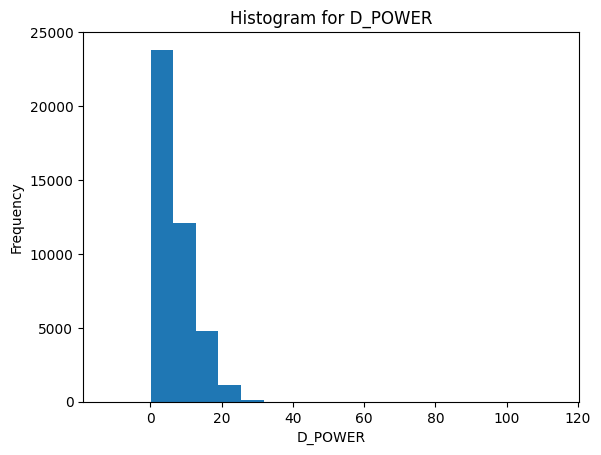

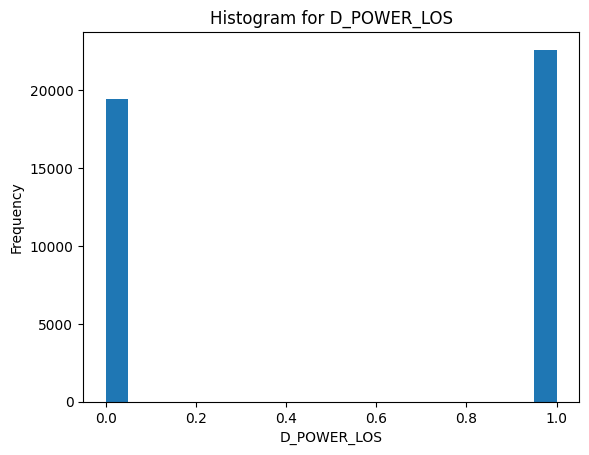

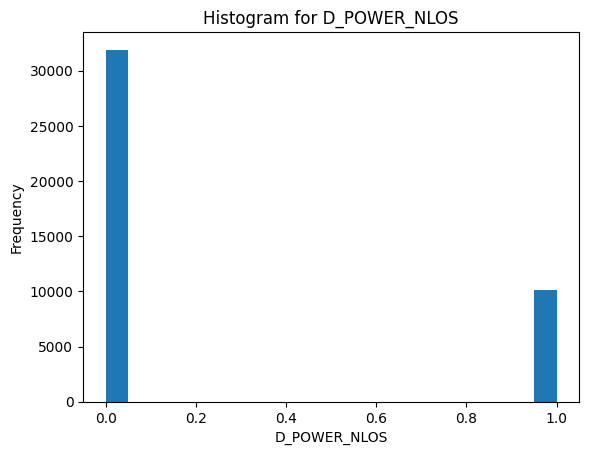

In [27]:
# Visualise distribution of each feature using boxplot
plt.figure(figsize=(20, 10))
df_noncir.boxplot()
plt.show()

# Visualise distribution of each feature using histogram (exclude first class column)
for column in df_noncir.columns[1:]:
    plt.hist(df_noncir[column], 20)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Observe the data variation of the aggragated data against NLOS

CIR PEAK VALUE AND EARLY ENERGY

In [ ]:
aggregated_cir_df = pd.concat([df_original.iloc[:, :1], new_cir_df], axis=1).copy()
aggregated_cir_df

NLOS  CIR_PEAK_VALUE  CIR_ENERGY_SUM  CIR_EARLY_ENERGY    CIR_MEAN  \
0       0.0         21328.0        690693.0           43361.0  679.815945   
1       0.0         17025.0        350447.0           18857.0  344.928150   
2       0.0         17838.0        442517.0           24651.0  435.548228   
3       0.0         18138.0        362977.0           19265.0  357.260827   
4       0.0         17817.0        366307.0           18168.0  360.538386   
...     ...             ...             ...               ...         ...   
41995   1.0         11609.0        385449.0           25625.0  379.378937   
41996   1.0         17403.0        725497.0           54913.0  714.071850   
41997   0.0         19373.0        750502.0           20956.0  738.683071   
41998   1.0         22619.0        487767.0           21050.0  480.085630   
41999   1.0          5833.0        317080.0           25247.0  312.086614   

       CIR_VARIANCE  CIR_SKEWNESS  CIR_KURTOSIS  
0      2.791582e+06      7.548897     66.833927  
1      1.485065e+06     10.453308    119.222133  
2      1.524761e+06      9.276358     99.495962  
3      1.524792e+06     10.457185    120.581015  
4      1.295946e+06      9.705158    109.001843  
...             ...           ...           ...  
41995  5.612658e+05      9.793655    117.900486  
41996  9.891505e+05      9.107614    115.730667  
41997  4.666633e+06      5.556110     33.264859  
41998  1.540242e+06     10.109507    139.096338  
41999  1.379543e+05      7.885888     88.104860  

[42000 rows x 8 columns]

Histograms for aggregated CIR dataset


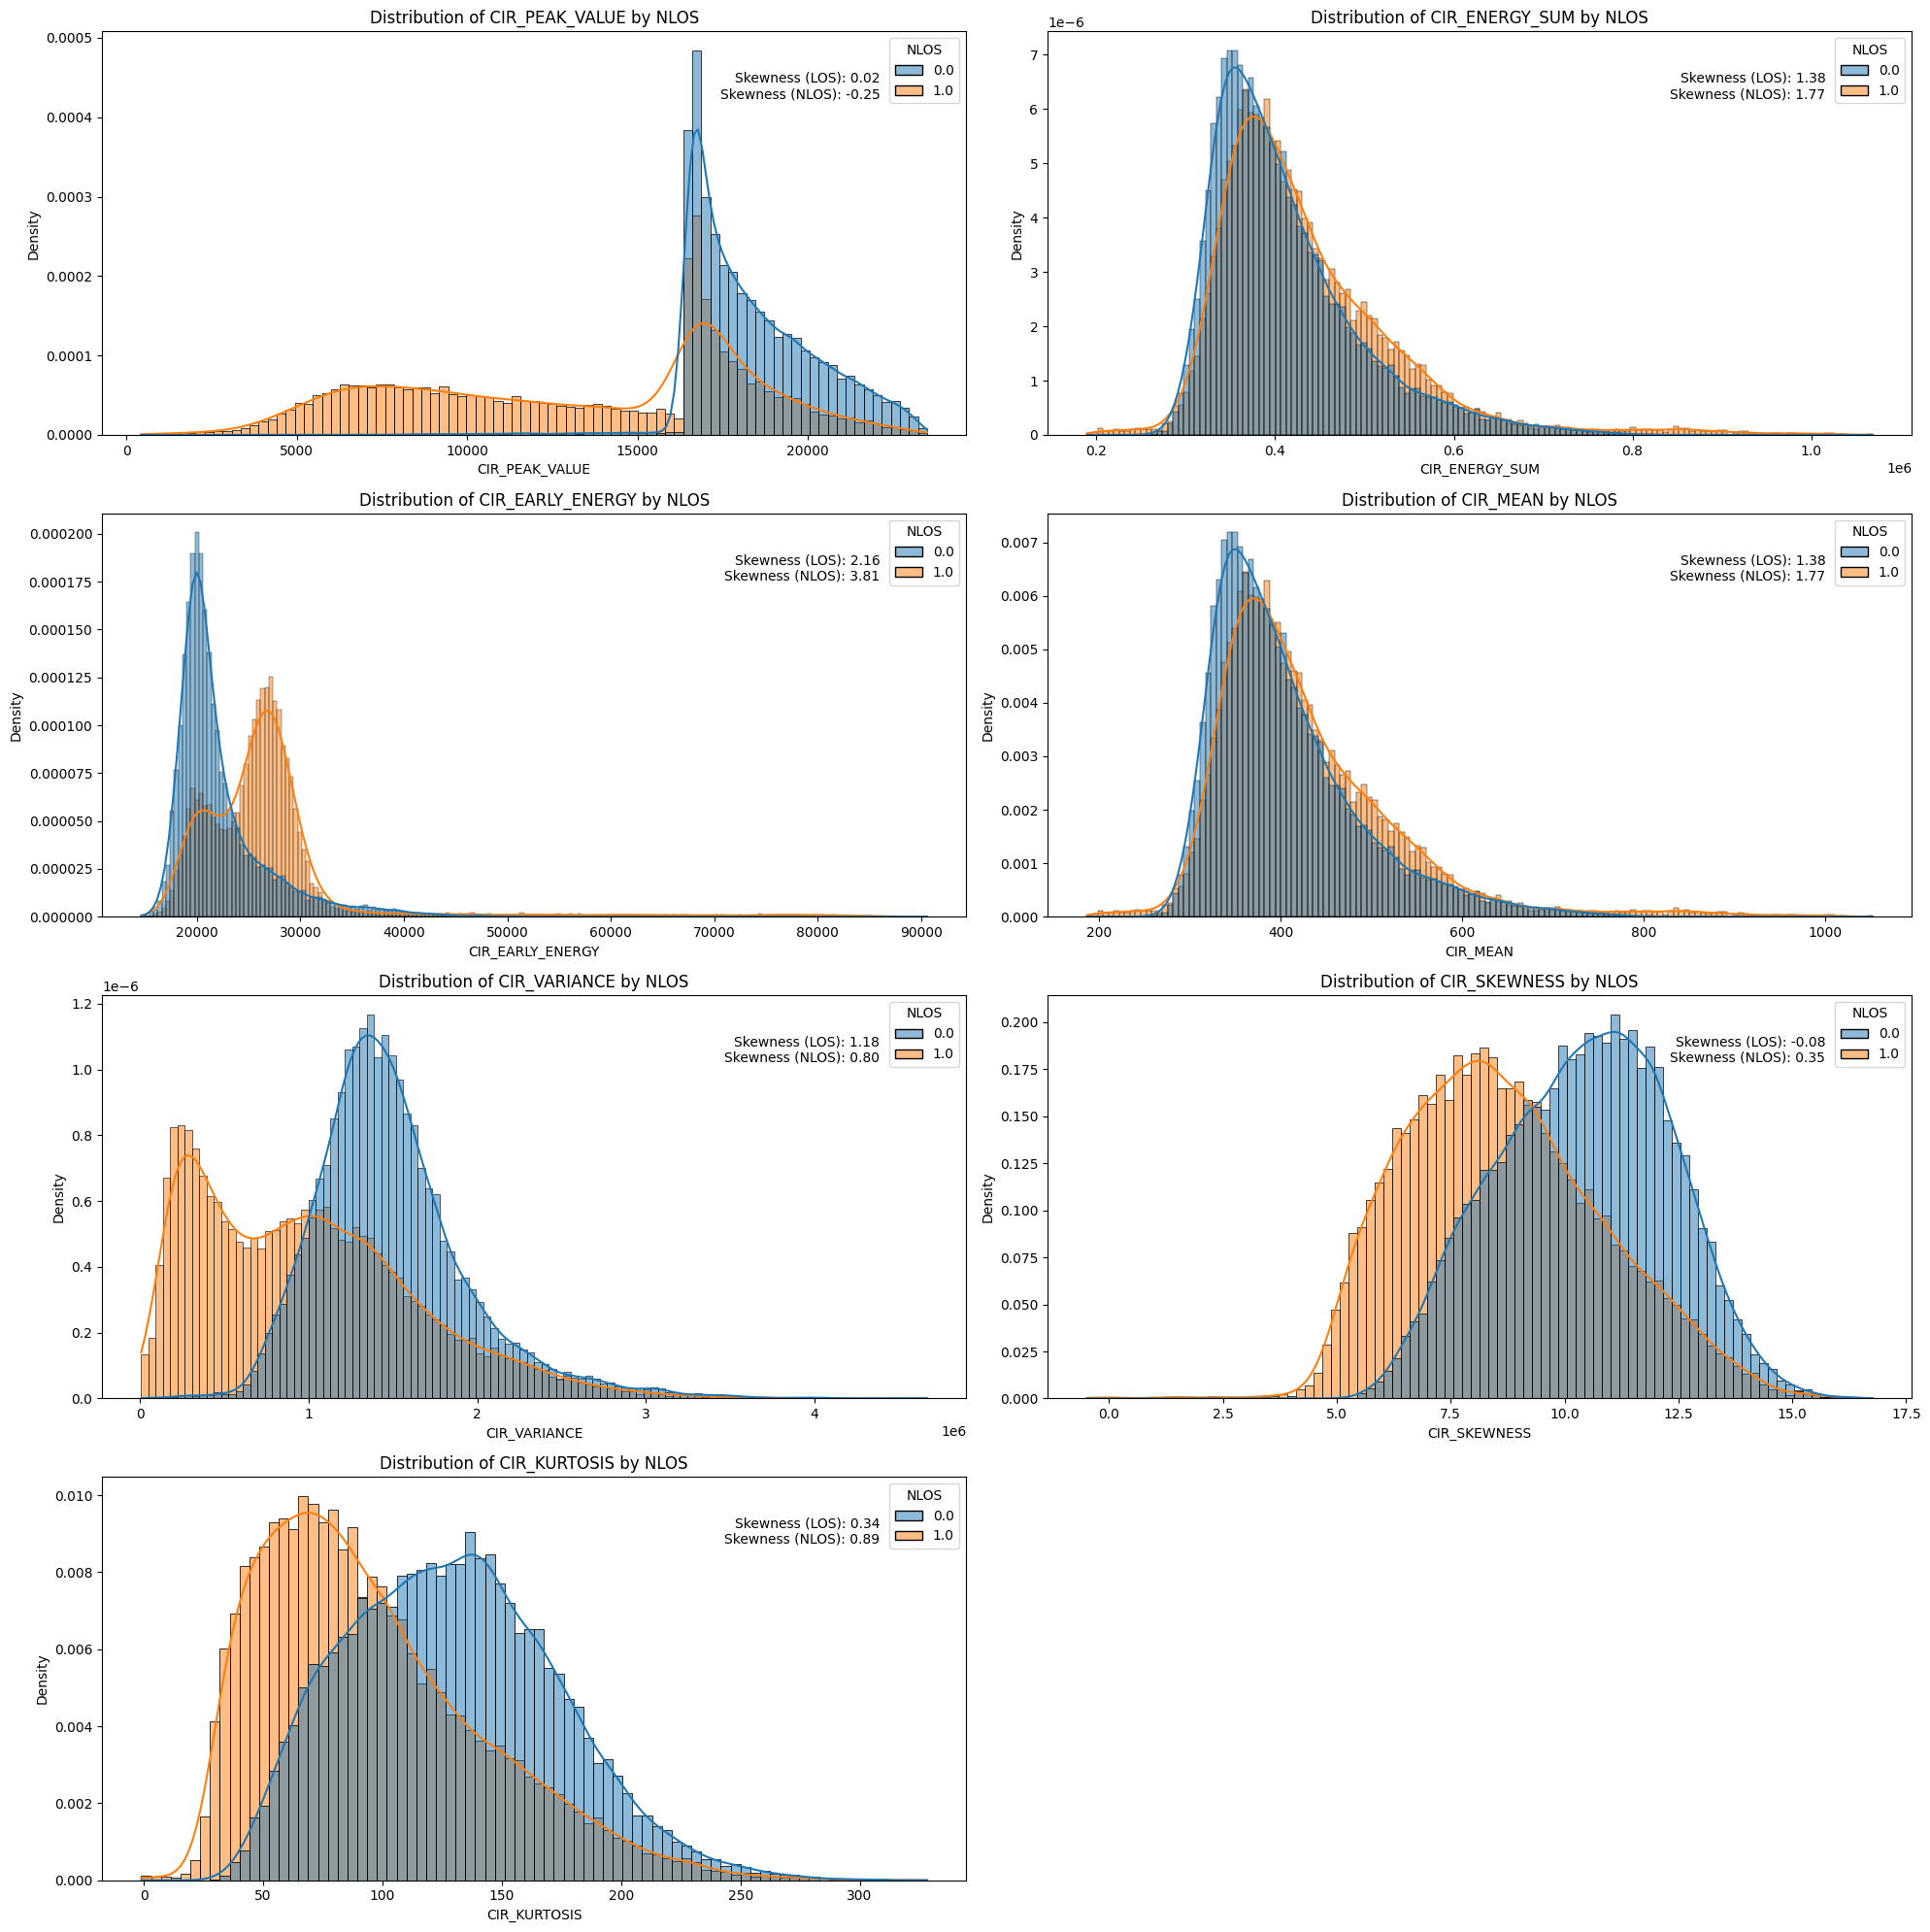

In [ ]:
# Get non-class features
features = [i for i in aggregated_cir_df.columns if i != 'NLOS']

# Plot histograms
print("Histograms for aggregated CIR dataset")
plot_histogram(aggregated_cir_df, features)

In [ ]:
# Function to plot feature-NLOS boxplot with different colors for each class and a custom legend
def plot_box_plot(df, features):
    # Define colors for each class
    palette = {0: "skyblue", 1: "orange"}
    
    # Plot numerical features with respect to the target variable
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features, start=1):
        plt.subplot(len(features)//2 + 1, 2, i)
        sns.boxplot(x='NLOS', y=feature, hue='NLOS', data=df, palette=palette, dodge=False, legend=False)
        plt.title(f'Boxplot of {feature}')
        plt.xlabel('Class')
        plt.ylabel(feature)
    
    # Create a legend for the plot
    handles = [plt.Rectangle((0,0),1,1, color=palette[label]) for label in palette.keys()]
    labels = ["LOS", "NLOS"]
    plt.figlegend(handles, labels, loc='lower right', title="Class")
    
    plt.tight_layout()
    plt.show()


Boxplots for aggregated CIR dataset


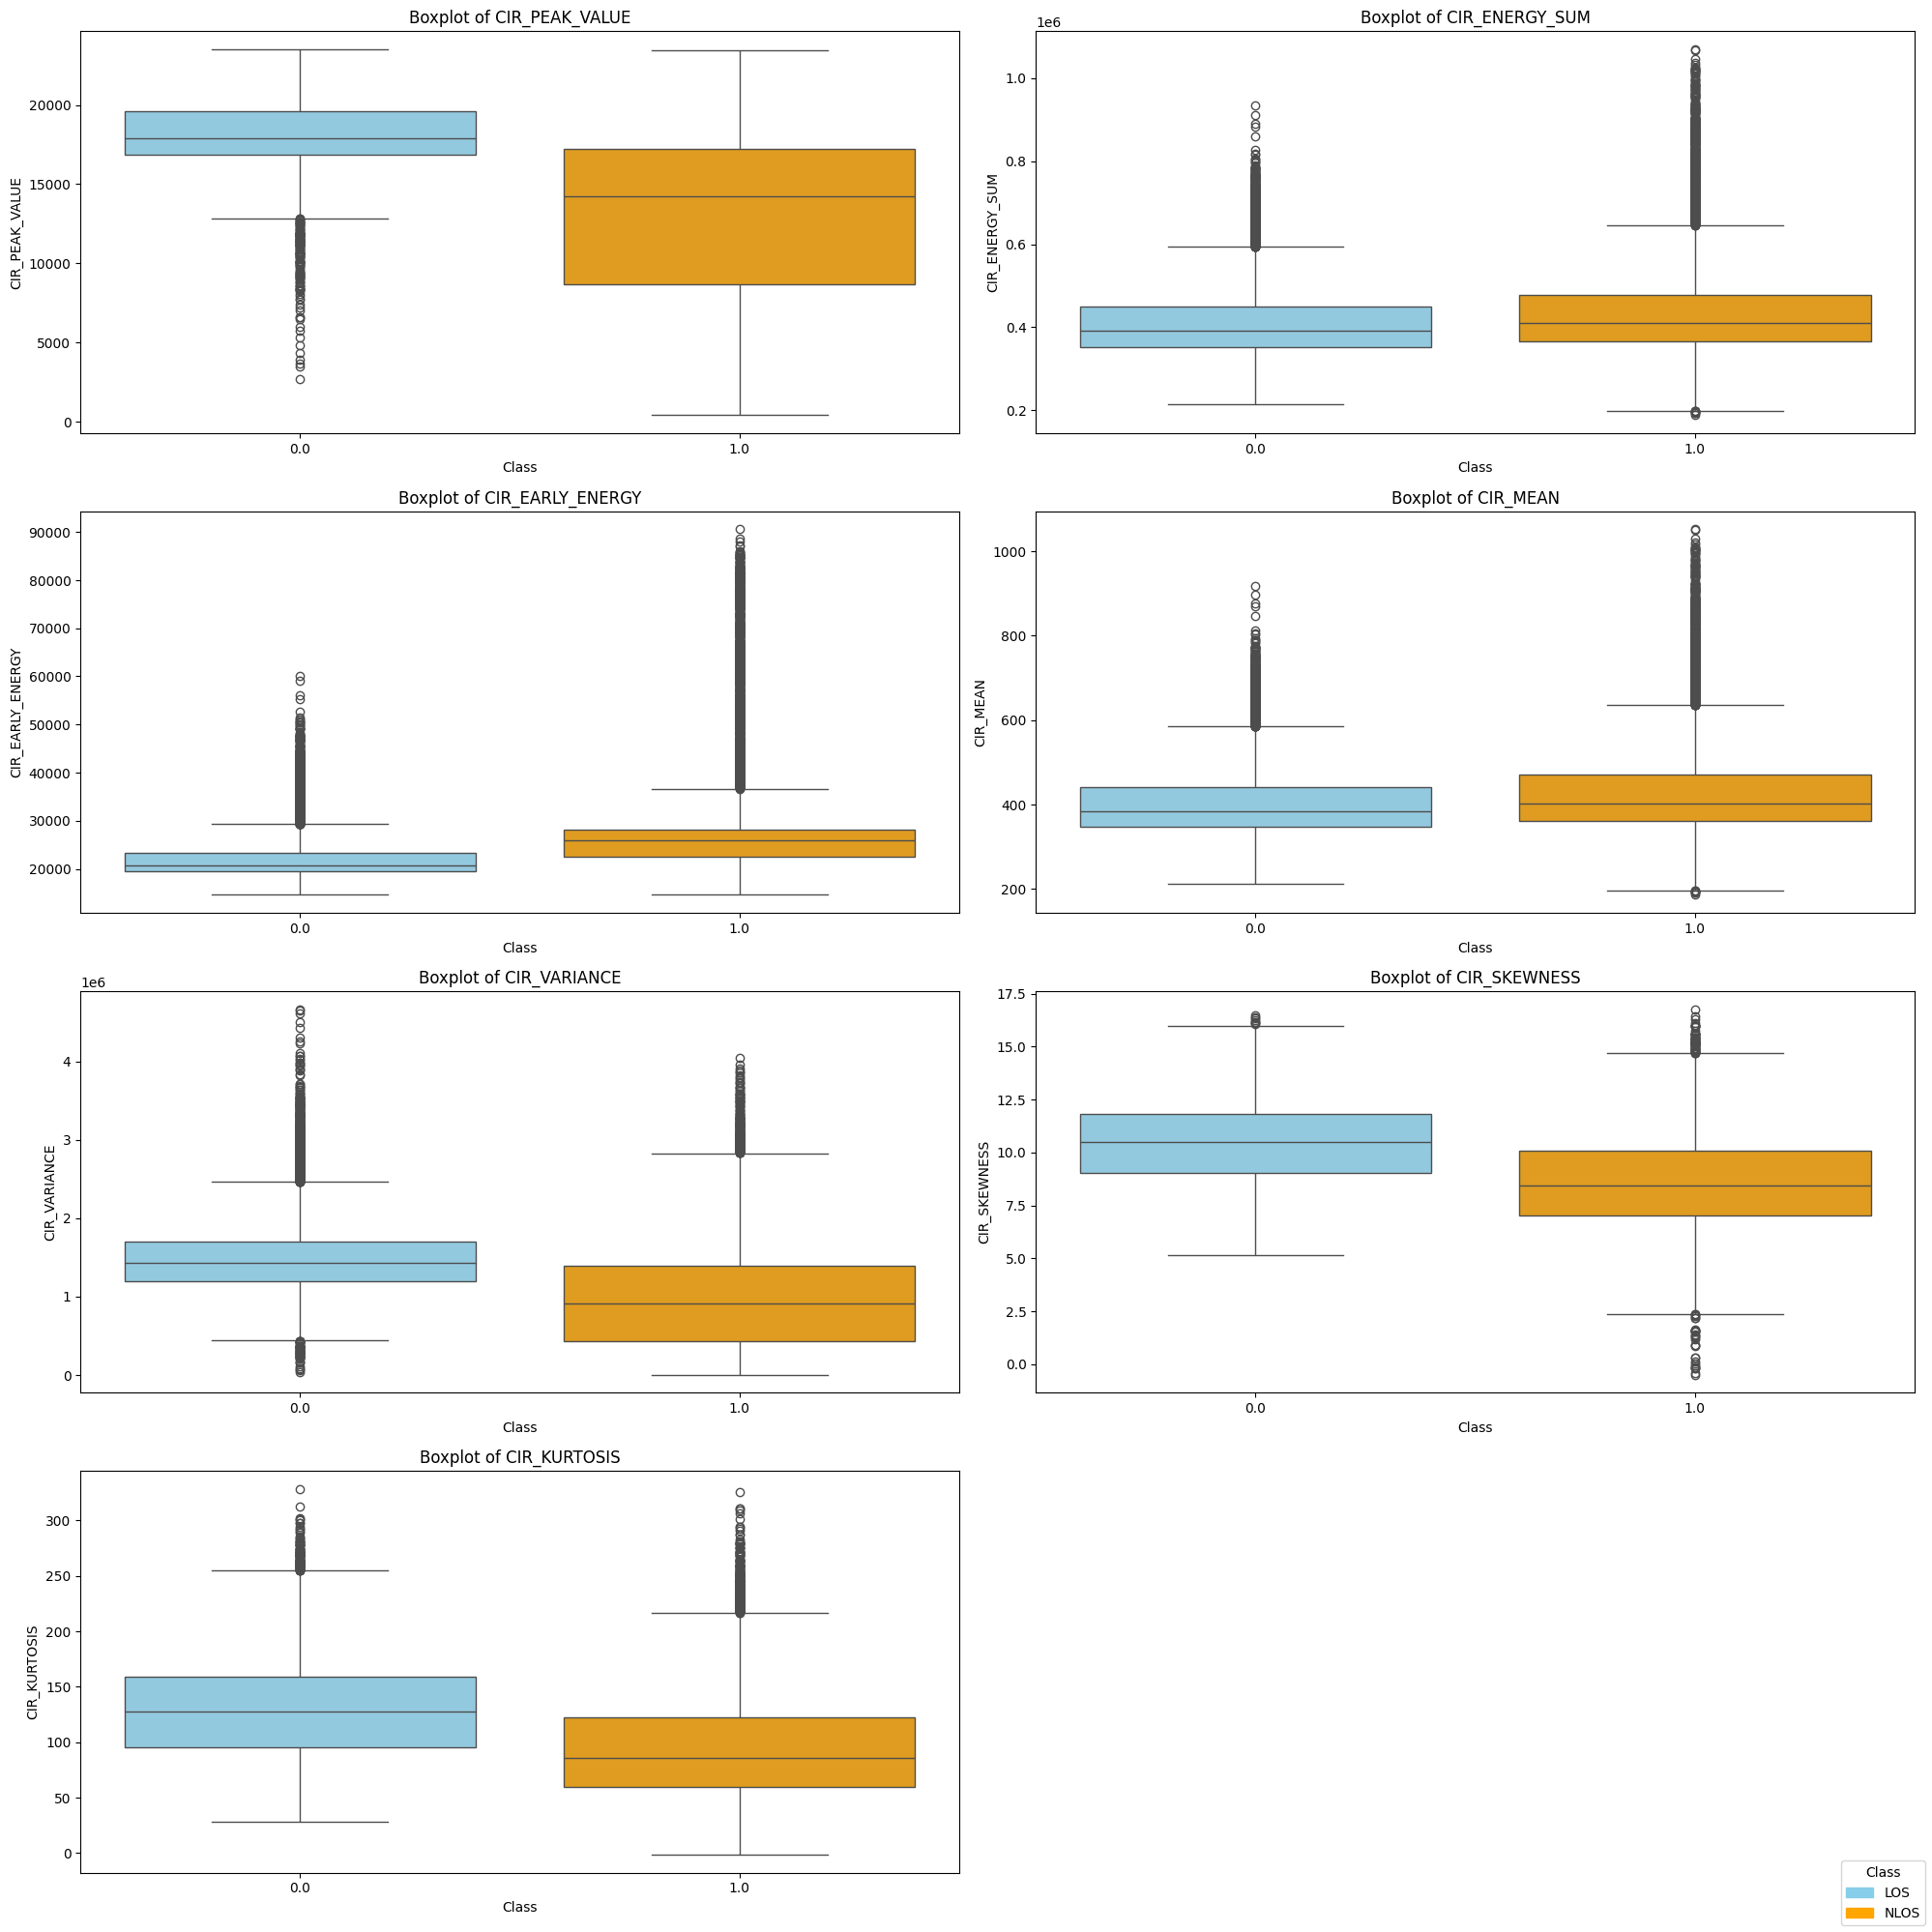

In [ ]:
# Get non-class features
features = [i for i in aggregated_cir_df.columns if i != 'NLOS']

# Plot boxplots
print("Boxplots for aggregated CIR dataset")
plot_box_plot(aggregated_cir_df, features)

#### Results Analysis

There are a fk ton of outliers visualised.

## Alternative -> Feature Engineering of the CIR datas

We try to calculate the eigen energy for the CIR Data Columns. To see how many number of components best explains close to 90% of the variance.

(42000, 23)


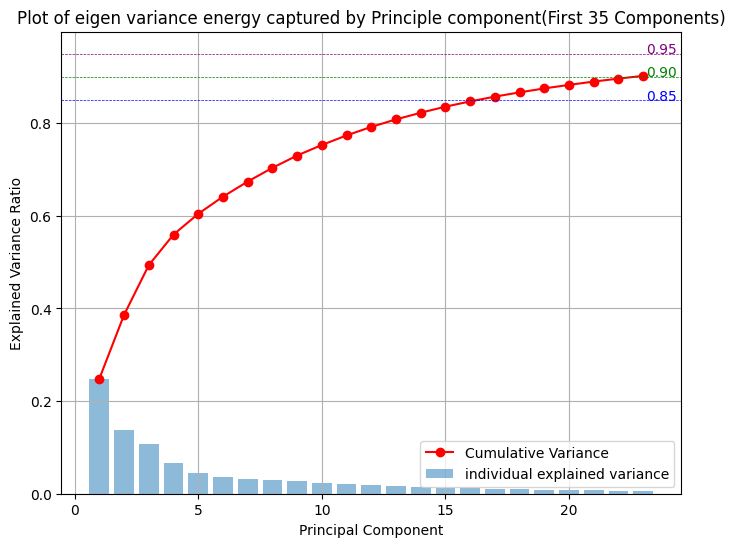

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Filter the dataset to only include the CIR columns and Class
temp_cir_df = cir_df

# Apply PCA
pca = PCA()
pca.fit(temp_cir_df)

# Calculate explained variance ratio (eigen energy)
eigen_energy = pca.explained_variance_ratio_[:35]  # Consider only the first 35 components
cumulative_variance = np.cumsum(eigen_energy)  # Cumulative explained variance

# Plot the explained variance ratio for the first 12 components
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigen_energy) + 1), eigen_energy, alpha=0.5, align='center', label=f'individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')

# Plot horizontal lines for specified thresholds
thresholds = [0.85, 0.90, 0.95]
threshold_colors = ['blue', 'green', 'purple']
for threshold, color in zip(thresholds, threshold_colors):
    plt.axhline(y=threshold, color=color, linestyle='--', linewidth=0.5)
    plt.text(len(cumulative_variance) + 0.1, threshold, f'{threshold:.2f}', color=color)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f"Plot of eigen variance energy captured by Principle component(First 35 Components)")
plt.legend()
plt.grid(True)
plt.show()

 _component = 25_ gives 90% accumulated variance. 

In [ ]:
# Apply PCA
pca = PCA(n_components=25)
cir_df_pca = pca.fit_transform(temp_cir_df)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(25)]  
cir_df_pca = pd.DataFrame(cir_df_pca, columns=pca_columns)

cir_df_pca


PC1           PC2           PC3           PC4          PC5  \
0       7738.528211  19942.478391   4995.891830  -1340.228360  5763.008746   
1      -7105.812164  10568.625466  -7949.056888   4158.447485 -3805.101452   
2     -12837.142861   8936.989875   4676.919974   7060.525585  2887.657951   
3      17336.589502  -6443.440083   -308.666705  10722.763781 -6521.404163   
4     -13136.913863   1951.557797   9579.321344   5000.480894  2010.541097   
...             ...           ...           ...           ...          ...   
41995   1736.656748  -8200.260406   -203.542244  -2302.734986 -5198.356251   
41996   8294.841759  -5642.536276   7022.526294   1423.188010 -4281.104405   
41997  34568.551885   6148.992572  28179.155465  -4393.361149  3515.419802   
41998 -11577.605775   7747.588981  12904.772521   -936.841589 -7536.663378   
41999 -10577.758490 -17196.581071   2115.683655   -485.660896  -508.550042   

               PC6          PC7          PC8          PC9         PC10  ...  \
0     -3144.209225  6389.924054 -3687.755577  5087.298016  3802.098292  ...   
1      1000.517734 -7223.862234  6766.025463 -4499.035938   -24.917248  ...   
2     -4531.759760  1363.312332 -4549.186021 -1919.909346 -7746.035979  ...   
3      2265.453165  2731.494576  1692.825854  -449.570124  4312.726735  ...   
4     -7727.430351 -4031.315785 -4214.132270  -772.536669  6470.303999  ...   
...            ...          ...          ...          ...          ...  ...   
41995 -6979.088044 -2930.187272   -70.564260  2108.451682 -5476.856887  ...   
41996 -6919.871794  4768.693951  5853.180018  1878.904552  4638.679497  ...   
41997  5258.179951   989.195026  3789.373213  5475.092606 -4217.547010  ...   
41998  7849.035625 -2466.790691  7894.818335 -5554.131836  -585.565004  ...   
41999  -640.290178   -11.931549  1432.405931 -1145.688783  -339.207258  ...   

              PC16         PC17         PC18         PC19         PC20  \
0     -5198.980369   699.789070 -4447.396363 -1197.639609  3803.310283   
1       745.754090  2122.729254  -726.826475  -464.418429   575.370713   
2       917.912146  3317.755718 -2353.401082  3579.392196  1349.796952   
3     -1452.860420 -1543.267313 -1917.972476 -1789.077884 -3555.778174   
4     -1730.263493  2056.952408 -4280.998665  1716.716547  1569.459187   
...            ...          ...          ...          ...          ...   
41995 -2807.175160  -472.872225   200.946785  -473.447897   494.519852   
41996 -1076.598718 -2630.748623   -73.766917 -1246.247137  7457.264963   
41997  4400.376930  2582.945078  6552.406746  4258.137589  8608.657781   
41998   242.611433   470.523904   659.379851 -2587.430662 -5481.463361   
41999    23.306553  1149.657619   163.021037  -378.469542    -3.464635   

              PC21         PC22         PC23         PC24         PC25  
0      1020.110758  4745.923218  1457.384336  5581.530011  -543.870232  
1      -579.032869   345.296309   791.581819   144.271971  -331.276318  
2       476.028087  1947.015863   381.284428  -246.477956  2384.696052  
3      1006.731732  1836.484541 -1315.954496  -990.974071  -398.301172  
4     -1917.152823 -1910.169858   999.248448  1195.939877  -458.562481  
...            ...          ...          ...          ...          ...  
41995  -771.897498  -551.746511   -48.463820 -2371.371142  -673.317095  
41996  4745.223824   649.697986  3134.178555 -1887.215042   242.296405  
41997  1691.477000 -8137.944746 -7610.604220  2395.223462 -4672.856868  
41998  1594.651433  1951.968305 -2937.855626  1565.029013  -395.405612  
41999  -760.080636    57.978593   368.855000  -601.505770   772.742110  

[42000 rows x 25 columns]

#### Results Analysis

With PCA, we aim to visualise all the CIR data, summarised into this 25 PC components. This reduce the variance of data caused by aggregation.

#### For all CIR data we have made into two type of dataset.

new_cir_df = CIR data combined into Mean, Variance, Skewness....



cir_df_pca = PCA of all the CIR data

### Lets combine all the data for training

1) First 15 re-engineered to get First Path Power level and Receive Signal Level. Second half re-engineered to the mean, variance

In [ ]:
from sklearn.preprocessing import StandardScaler

dataset_1 = pd.concat([no_cir_df_transform, new_cir_df], axis=1)
temp_df = dataset_1.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=temp_df.columns)

df_scaled['NLOS'] = temp_df['NLOS'].values

# Export data
save_to_pickle("dataset_1", temp_df)

df_scaled.head()

NLOS     RANGE    FP_IDX  STDEV_NOISE  MAX_NOISE  FP_POWER_LEVEL  RX_LEVEL  \
0   0.0  0.445105 -0.367180     1.218119   0.564628       -0.149601  0.434310   
1   0.0 -1.214528  0.076804    -0.828409  -0.218351        1.130337  1.086912   
2   0.0 -1.172082 -0.145188     1.490990   3.081836        1.169498  1.161191   
3   0.0 -1.244240  1.186764    -0.419104   0.167987        1.064997  1.093864   
4   0.0 -0.442014 -0.367180    -0.964845  -0.984159        0.690988  0.506525   

   CIR_PEAK_VALUE  CIR_ENERGY_SUM  CIR_EARLY_ENERGY  CIR_MEAN  CIR_VARIANCE  \
0        1.204340        2.869312          2.594143  2.869312      2.508702   
1        0.265790       -0.772046         -0.781943 -0.772046      0.396802   
2        0.443118        0.213299          0.016336  0.213299      0.460968   
3        0.508552       -0.637949         -0.725730 -0.637949      0.461018   
4        0.438537       -0.602311         -0.876871 -0.602311      0.091102   

   CIR_SKEWNESS  CIR_KURTOSIS  
0     -0.890665     -0.931266  
1      0.415196      0.145728  
2     -0.113976     -0.259802  
3      0.416940      0.173663  
4      0.078818     -0.064380

2) First 15 re-engineered to get First Path Power level and Recieve Signal Level. Second half is the PCA of the CIR Data

In [ ]:
dataset_2 = pd.concat([no_cir_df_transform, cir_df_pca], axis=1)
save_to_pickle("dataset_2", dataset_2)
dataset_2

NLOS  RANGE  FP_IDX  STDEV_NOISE  MAX_NOISE  FP_POWER_LEVEL  \
0       0.0   4.88   744.0        108.0     1645.0      -94.596003   
1       0.0   0.97   746.0         48.0     1189.0      -82.200844   
2       0.0   1.07   745.0        116.0     3111.0      -81.821606   
3       0.0   0.90   751.0         60.0     1414.0      -82.833613   
4       0.0   2.79   744.0         44.0      743.0      -86.455578   
...     ...    ...     ...          ...        ...             ...   
41998   1.0   6.87   738.0         72.0     1071.0     -114.306118   
41999   1.0   6.02   742.0         68.0     1028.0     -107.508017   
2261    NaN    NaN     NaN          NaN        NaN             NaN   
16288   NaN    NaN     NaN          NaN        NaN             NaN   
24651   NaN    NaN     NaN          NaN        NaN             NaN   

         RX_LEVEL           PC1           PC2           PC3  ...         PC16  \
0      -83.242593   7738.528211  19942.478391   4995.891830  ... -5198.980369   
1      -78.924940  -7105.812164  10568.625466  -7949.056888  ...   745.754090   
2      -78.433506 -12837.142861   8936.989875   4676.919974  ...   917.912146   
3      -78.878945  17336.589502  -6443.440083   -308.666705  ... -1452.860420   
4      -82.764816 -13136.913863   1951.557797   9579.321344  ... -1730.263493   
...           ...           ...           ...           ...  ...          ...   
41998  -87.757599 -11577.605775   7747.588981  12904.772521  ...   242.611433   
41999 -100.916635 -10577.758490 -17196.581071   2115.683655  ...    23.306553   
2261          NaN -10308.170106 -24466.048651  -3265.836348  ...   277.544733   
16288         NaN -10186.828938 -24863.636587  -3263.285979  ...   351.627460   
24651         NaN -10148.345232 -24755.304185  -3287.036249  ...   280.647387   

              PC17         PC18         PC19         PC20         PC21  \
0       699.789070 -4447.396363 -1197.639609  3803.310283  1020.110758   
1      2122.729254  -726.826475  -464.418429   575.370713  -579.032869   
2      3317.755718 -2353.401082  3579.392196  1349.796952   476.028087   
3     -1543.267313 -1917.972476 -1789.077884 -3555.778174  1006.731732   
4      2056.952408 -4280.998665  1716.716547  1569.459187 -1917.152823   
...            ...          ...          ...          ...          ...   
41998   470.523904   659.379851 -2587.430662 -5481.463361  1594.651433   
41999  1149.657619   163.021037  -378.469542    -3.464635  -760.080636   
2261   1235.923119  -696.051594  1121.475492  -988.931349 -1872.458477   
16288  1128.403941 -1115.038514  1106.892474  -876.906980 -1786.376975   
24651  1086.893119  -988.679087  1283.536453 -1244.656524 -1632.641082   

              PC22         PC23         PC24         PC25  
0      4745.923218  1457.384336  5581.530011  -543.870232  
1       345.296309   791.581819   144.271971  -331.276318  
2      1947.015863   381.284428  -246.477956  2384.696052  
3      1836.484541 -1315.954496  -990.974071  -398.301172  
4     -1910.169858   999.248448  1195.939877  -458.562481  
...            ...          ...          ...          ...  
41998  1951.968305 -2937.855626  1565.029013  -395.405612  
41999    57.978593   368.855000  -601.505770   772.742110  
2261  -1023.734352  -454.484620   521.677455  -250.748625  
16288 -1045.455972  -500.010306   318.496394  -371.687293  
24651  -996.200269  -593.278552   215.022531  -409.737512  

[42000 rows x 32 columns]

3) First 15, drop all unimportant features. Second half re-engineered to the mean, variance

In [ ]:
dataset_3 = pd.concat([df_noncir_trimmed, new_cir_df], axis=1)
temp_df = dataset_3.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=temp_df.columns)

df_scaled['NLOS'] = temp_df['NLOS'].values

df_scaled.head()
save_to_pickle("dataset_3", temp_df)
dataset_3

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
1       0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2       0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3       0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
4       0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
41996   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
41997   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
41998   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
41999   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

       MAX_NOISE  RXPACC  CIR_PEAK_VALUE  CIR_ENERGY_SUM  CIR_EARLY_ENERGY  \
0         1645.0   654.0         21328.0        690693.0           43361.0   
1         1189.0   280.0         17025.0        350447.0           18857.0   
2         3111.0   268.0         17838.0        442517.0           24651.0   
3         1414.0   293.0         18138.0        362977.0           19265.0   
4          743.0   413.0         17817.0        366307.0           18168.0   
...          ...     ...             ...             ...               ...   
41995     1188.0  1024.0         11609.0        385449.0           25625.0   
41996     3126.0   669.0         17403.0        725497.0           54913.0   
41997     1068.0   695.0         19373.0        750502.0           20956.0   
41998     1071.0   808.0         22619.0        487767.0           21050.0   
41999     1028.0  1024.0          5833.0        317080.0           25247.0   

         CIR_MEAN  CIR_VARIANCE  CIR_SKEWNESS  CIR_KURTOSIS  
0      679.815945  2.791582e+06      7.548897     66.833927  
1      344.928150  1.485065e+06     10.453308    119.222133  
2      435.548228  1.524761e+06      9.276358     99.495962  
3      357.260827  1.524792e+06     10.457185    120.581015  
4      360.538386  1.295946e+06      9.705158    109.001843  
...           ...           ...           ...           ...  
41995  379.378937  5.612658e+05      9.793655    117.900486  
41996  714.071850  9.891505e+05      9.107614    115.730667  
41997  738.683071  4.666633e+06      5.556110     33.264859  
41998  480.085630  1.540242e+06     10.109507    139.096338  
41999  312.086614  1.379543e+05      7.885888     88.104860  

[42000 rows x 17 columns]

 3) First 15, drop all unimportant features. Second half is the PCA of the CIR Data

In [ ]:
dataset_4 = pd.concat([df_non_cir_trimmed, cir_df_pca], axis=1)
save_to_pickle("dataset_4", dataset_4)
dataset_4

NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
1       0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2       0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3       0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
4       0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...     ...    ...     ...      ...      ...      ...          ...      ...   
41995   1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
41996   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
41997   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
41998   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
41999   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

       MAX_NOISE  RXPACC  ...         PC16         PC17         PC18  \
0         1645.0   654.0  ... -5198.980369   699.789070 -4447.396363   
1         1189.0   280.0  ...   745.754090  2122.729254  -726.826475   
2         3111.0   268.0  ...   917.912146  3317.755718 -2353.401082   
3         1414.0   293.0  ... -1452.860420 -1543.267313 -1917.972476   
4          743.0   413.0  ... -1730.263493  2056.952408 -4280.998665   
...          ...     ...  ...          ...          ...          ...   
41995     1188.0  1024.0  ... -2807.175160  -472.872225   200.946785   
41996     3126.0   669.0  ... -1076.598718 -2630.748623   -73.766917   
41997     1068.0   695.0  ...  4400.376930  2582.945078  6552.406746   
41998     1071.0   808.0  ...   242.611433   470.523904   659.379851   
41999     1028.0  1024.0  ...    23.306553  1149.657619   163.021037   

              PC19         PC20         PC21         PC22         PC23  \
0     -1197.639609  3803.310283  1020.110758  4745.923218  1457.384336   
1      -464.418429   575.370713  -579.032869   345.296309   791.581819   
2      3579.392196  1349.796952   476.028087  1947.015863   381.284428   
3     -1789.077884 -3555.778174  1006.731732  1836.484541 -1315.954496   
4      1716.716547  1569.459187 -1917.152823 -1910.169858   999.248448   
...            ...          ...          ...          ...          ...   
41995  -473.447897   494.519852  -771.897498  -551.746511   -48.463820   
41996 -1246.247137  7457.264963  4745.223824   649.697986  3134.178555   
41997  4258.137589  8608.657781  1691.477000 -8137.944746 -7610.604220   
41998 -2587.430662 -5481.463361  1594.651433  1951.968305 -2937.855626   
41999  -378.469542    -3.464635  -760.080636    57.978593   368.855000   

              PC24         PC25  
0      5581.530011  -543.870232  
1       144.271971  -331.276318  
2      -246.477956  2384.696052  
3      -990.974071  -398.301172  
4      1195.939877  -458.562481  
...            ...          ...  
41995 -2371.371142  -673.317095  
41996 -1887.215042   242.296405  
41997  2395.223462 -4672.856868  
41998  1565.029013  -395.405612  
41999  -601.505770   772.742110  

[42000 rows x 35 columns]

# References
[1] K. Bregar, A. Hrovat, and M. Mohorcic, “UWB LOS and NLOS Data Set,” GitHub, https://github.com/ewine-project/UWB-LOS-NLOS-Data-Set (accessed Mar. 30, 2024). <br>
[2] K. Bregar, A. Hrovat, and M. Mohorcic, “NLOS Channel Detection with Multilayer Perceptron in Low-Rate Personal Area Networks for Indoor Localization Accuracy Improvement,” Jožef Stefan International Postgraduate School Student Conference, May 2016. [Online]. Available: https://www.researchgate.net/publication/308986067_NLOS_Channel_Detection_with_Multilayer_Perceptron_in_Low-Rate_Personal_Area_Networks_for_Indoor_Localization_Accuracy_Improvement <br>
[3] D. Decawave, “DW1000 User Manual,” decaWave DW1000 User Manual, https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf (accessed Mar. 30, 2024). 